In [1]:
#Using these imports that are the necessary libraries to start with the EDA
import pandas as pd 
import pandas_datareader as web 
import datetime

import matplotlib.pyplot as plt
import seaborn as sns

#Relax the display limits on columns and rows
pd.set_option('display.max_columns', None)
pd.set_option('display.max_rows', None)

import warnings
warnings.filterwarnings('ignore')

In [2]:
gasConsumption = pd.read_csv('2023-Q3-Daily-supply.csv')# Using pandas to read our data and transforming it into a dataframe

gasConsumption.head(5) #First thing to do is to visualise our df

Date  Corrib production      Moffat  ROI imports via interconnector  \
0  01/01/2018         102.065496   71.311111                       27.152195   
1  02/01/2018         101.201763   72.300000                       31.378951   
2  03/01/2018         101.289081   94.022222                       51.224061   
3  04/01/2018         102.011852  128.000000                       77.649775   
4  05/01/2018         101.724944  127.900000                       84.766547   

        Total  
0  200.528802  
1  204.880714  
2  246.535364  
3  307.661627  
4  314.391491

In [3]:
missingValues = gasConsumption['Total'].isnull().sum()
if missingValues > 0:
    print(f'There are {missingValues} missing values in the time series.')
else:
    print('There are no missing values in the time series.')

There are no missing values in the time series.


In [4]:
gasConsumption = gasConsumption.drop(columns = ['Corrib production', 'Moffat', 'ROI imports via interconnector'])
     #after seeing the dataset a lot of data are decided not to be kept simply because they are not needed

In [5]:
gasConsumption.index = pd.to_datetime(gasConsumption['Date'], format='%d/%m/%Y')
del gasConsumption['Date']

In [6]:
gasConsumption.head()

Total
Date                  
2018-01-01  200.528802
2018-01-02  204.880714
2018-01-03  246.535364
2018-01-04  307.661627
2018-01-05  314.391491

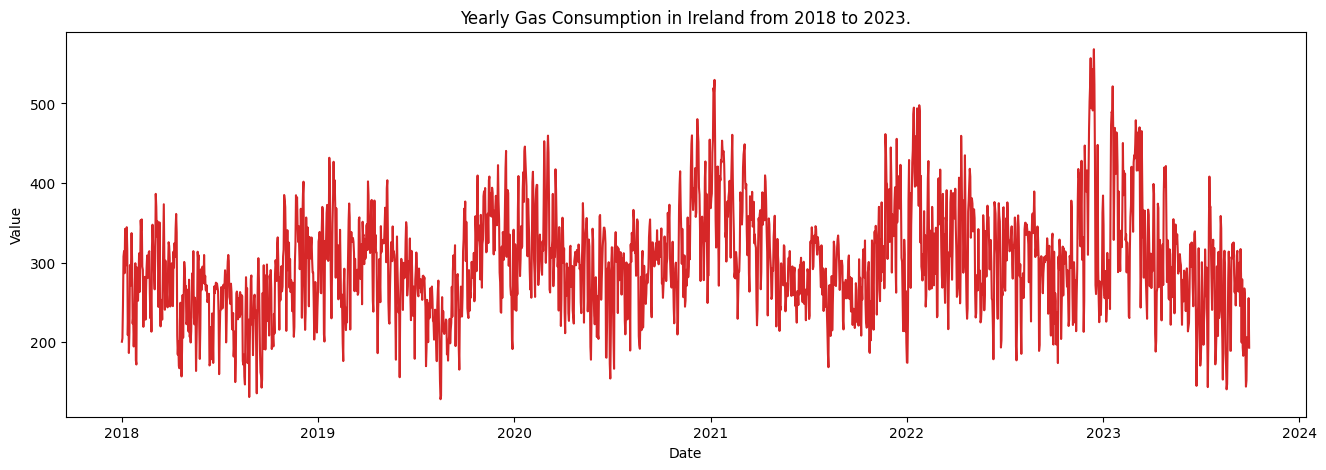

In [7]:
# Draw Plot
def plot_df(df, x, y, title="", xlabel='Date', ylabel='Value', dpi=100):
    plt.figure(figsize=(16,5), dpi=dpi)
    plt.plot(x, y, color='tab:red')
    plt.gca().set(title=title, xlabel=xlabel, ylabel=ylabel)
    plt.show()

plot_df(gasConsumption, x=gasConsumption.index, y=gasConsumption.Total, title='Yearly Gas Consumption in Ireland from 2018 to 2023.') 

In [8]:
print(gasConsumption.columns)


Index(['Total'], dtype='object')


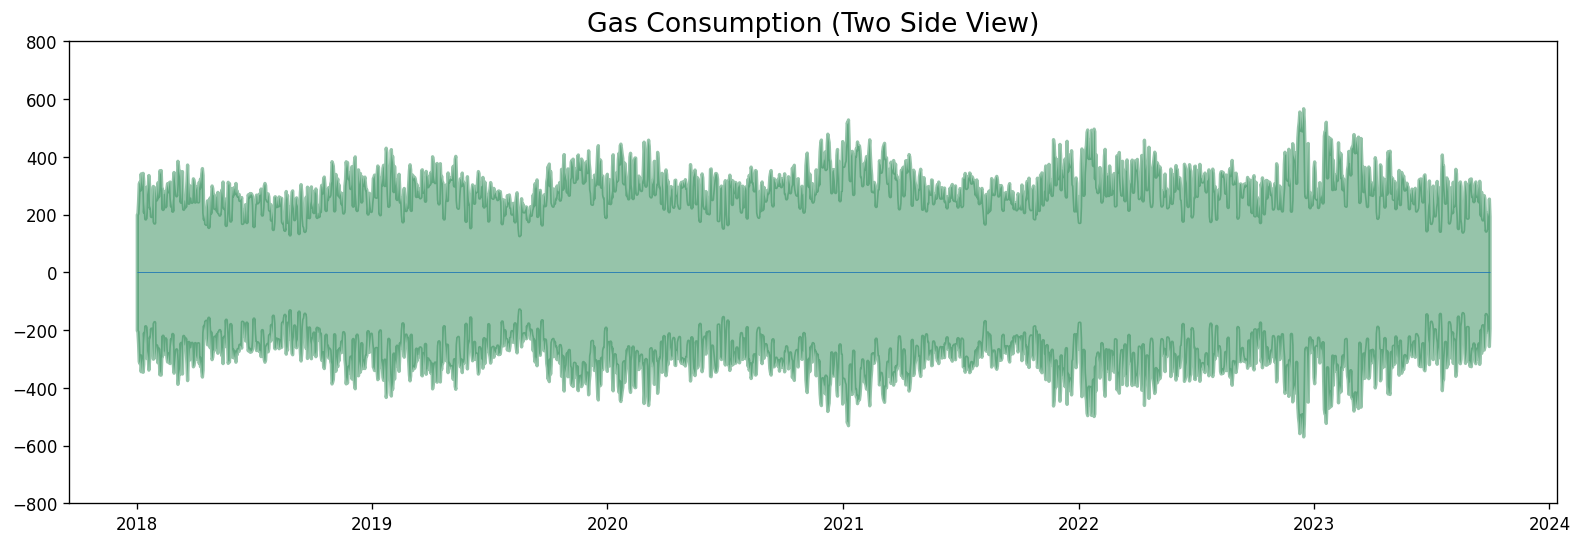

In [9]:
import numpy as np
x = gasConsumption.index
y1 = gasConsumption['Total']

# Plot
fig, ax = plt.subplots(1, 1, figsize=(16,5), dpi= 120)
plt.fill_between(x, y1=y1, y2=-y1, alpha=0.5, linewidth=2, color='seagreen')
plt.ylim(-800, 800)
plt.title('Gas Consumption (Two Side View)', fontsize=16)
plt.hlines(y=0, xmin=np.min(gasConsumption.index), xmax=np.max(gasConsumption.index), linewidth=.5)
plt.show()

In [10]:
print(gasConsumption.columns)

Index(['Total'], dtype='object')


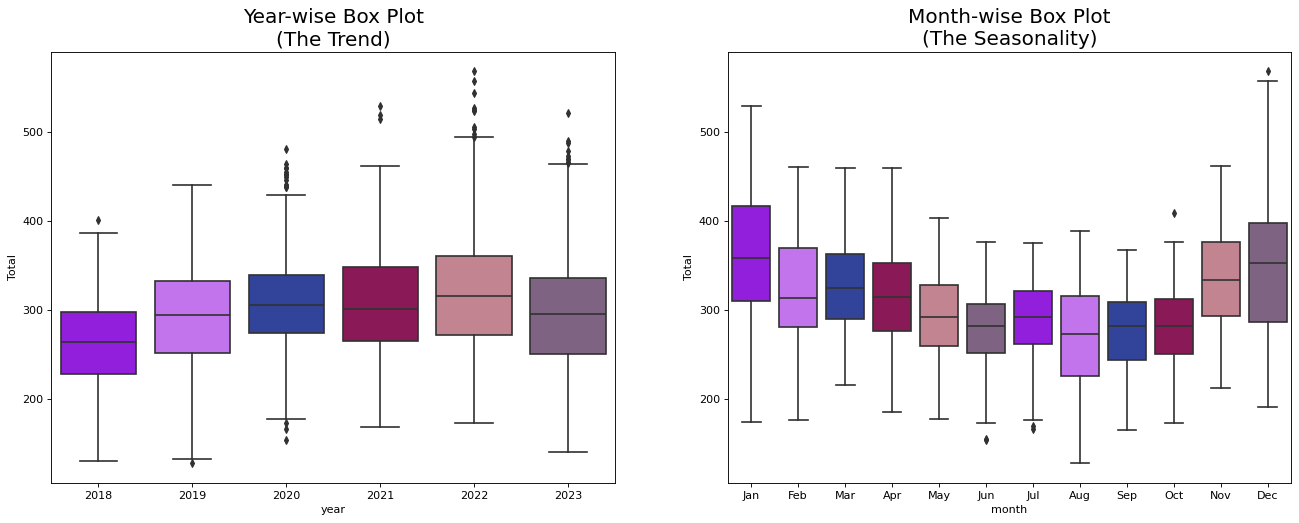

In [11]:
import matplotlib as mpl
gasConsumption['year'] = [d.year for d in gasConsumption.index]
gasConsumption['month'] = [d.strftime('%b') for d in gasConsumption.index]
years = gasConsumption['year'].unique()


np.random.seed(100)
mycolors = np.random.choice(list(mpl.colors.XKCD_COLORS.keys()), len(years), replace=False)
# Draw Plot
fig, axes = plt.subplots(1, 2, figsize=(20,7), dpi= 80)
sns.boxplot(x='year', y='Total', data=gasConsumption, ax=axes[0], palette=mycolors)
sns.boxplot(x='month', y='Total', data=gasConsumption.loc[~gasConsumption.year.isin([2018, 2023]), :], palette=mycolors)

# Set Title
axes[0].set_title('Year-wise Box Plot\n(The Trend)', fontsize=18); 
axes[1].set_title('Month-wise Box Plot\n(The Seasonality)', fontsize=18)
plt.show()

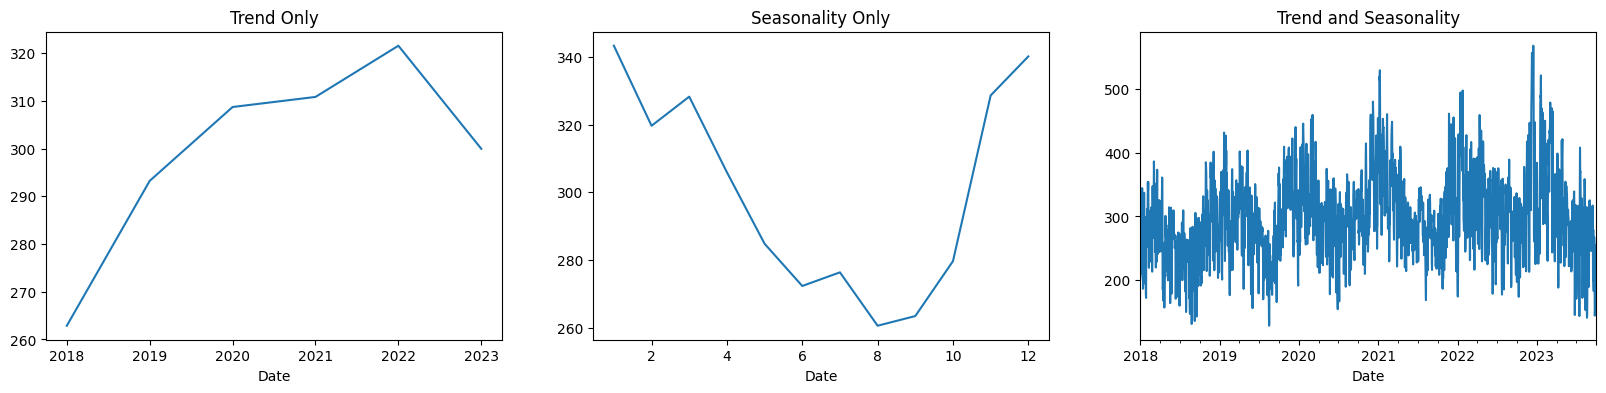

In [12]:
import matplotlib.pyplot as plt
import pandas as pd


fig, axes = plt.subplots(1, 3, figsize=(20, 4), dpi=100)


gasConsumption.groupby(gasConsumption.index.year)['Total'].mean().plot(title='Trend Only', legend=False, ax=axes[0])


gasConsumption.groupby(gasConsumption.index.month)['Total'].mean().plot(title='Seasonality Only', legend=False, ax=axes[1])
gasConsumption['Total'].plot(title='Trend and Seasonality', legend=False, ax=axes[2])

plt.show()


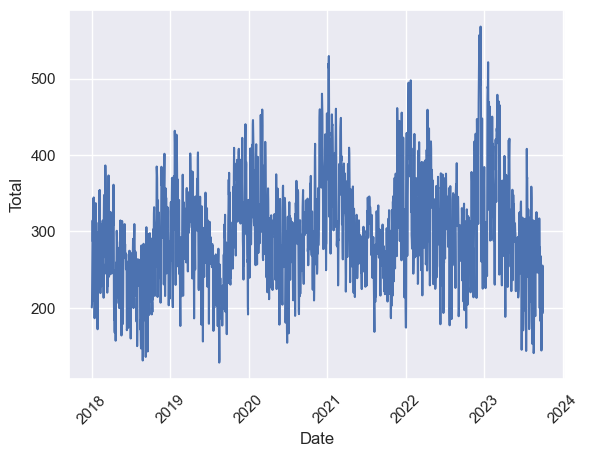

In [13]:
sns.set()
plt.ylabel('Total')
plt.xlabel ('Date')
plt.xticks(rotation =45)
plt.plot(gasConsumption.index, gasConsumption [ 'Total'],)
plt.show()

In [14]:
gasConsumption.shape #Using .shape to see the size of the dataframe, the rows and columns.


(2099, 3)

In [15]:
gasConsumption.info() #Using .info to see the content of the data frame, useful to identify my nulls, types, and names of columns

<class 'pandas.core.frame.DataFrame'>
DatetimeIndex: 2099 entries, 2018-01-01 to 2023-09-30
Data columns (total 3 columns):
 #   Column  Non-Null Count  Dtype  
---  ------  --------------  -----  
 0   Total   2099 non-null   float64
 1   year    2099 non-null   int64  
 2   month   2099 non-null   object 
dtypes: float64(1), int64(1), object(1)
memory usage: 65.6+ KB


In [16]:
gasConsumption.describe() #Summary of the statistical properties

Total         year
count  2099.000000  2099.000000
mean    299.502497  2020.390186
std      66.226037     1.660888
min     128.260467  2018.000000
25%     256.356077  2019.000000
50%     296.072343  2020.000000
75%     337.168651  2022.000000
max     568.131933  2023.000000

In [17]:
duplicate_rows_df = gasConsumption[gasConsumption.duplicated()]
print("Duplicated rows: ", duplicate_rows_df)

Duplicated rows:  Empty DataFrame
Columns: [Total, year, month]
Index: []


# RNN

In [18]:
# Load your data
gasConsumption = pd.read_csv('2023-Q3-Daily-supply.csv')

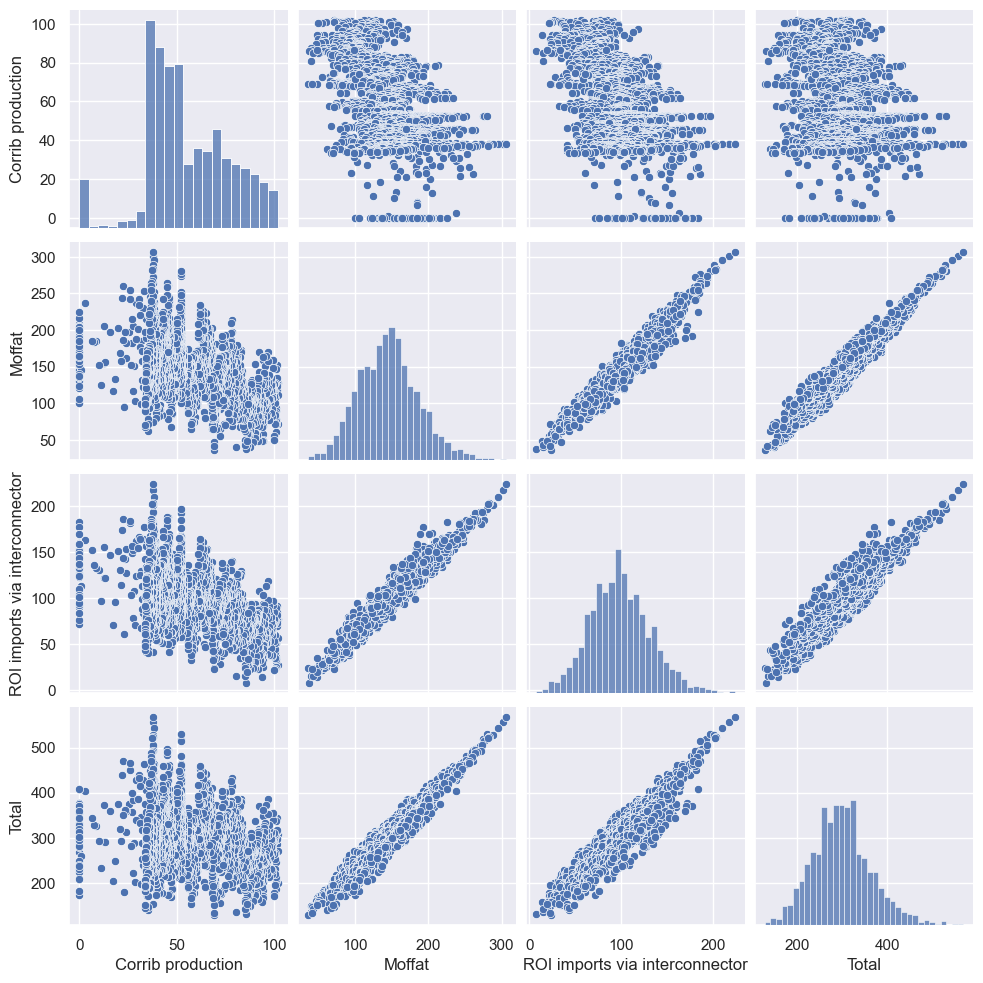

In [19]:
sns.pairplot(gasConsumption)

In [20]:
#Using the Total column as training data
training_data = gasConsumption['Total'].values

In [21]:
type(training_data)

numpy.ndarray

In [22]:

from sklearn.preprocessing import MinMaxScaler
# Data Normalization
scaler = MinMaxScaler()
training_data = scaler.fit_transform(training_data.reshape(-1, 1))

In [23]:
# Prepare the sequences for LSTM
x_training_data = []
y_training_data = []



In [24]:
for i in range(70, len(training_data)):
    x_training_data.append(training_data[i-70:i, 0])
    y_training_data.append(training_data[i, 0])

In [25]:
x_training_data = np.array(x_training_data)
y_training_data = np.array(y_training_data)


In [80]:
print(x_training_data.shape)
print(y_training_data.shape)

(2029, 70, 1)
(2029,)


In [27]:
x_training_data = np.reshape(x_training_data, (x_training_data.shape[0], x_training_data.shape[1], 1))

In [28]:
print(x_training_data.shape)

(2029, 70, 1)


In [29]:
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Dense
from tensorflow.keras.layers import LSTM
from tensorflow.keras.layers import Dropout

In [30]:

rnn = Sequential()
rnn.add(LSTM(units = 70, return_sequences = True, input_shape = (x_training_data.shape[1], 1)))
rnn.add(Dropout(0.2))
rnn.add(LSTM(units = 70, return_sequences = True))
rnn.add(Dropout(0.2))
rnn.add(LSTM(units = 70, return_sequences = True))
rnn.add(Dropout(0.2))
rnn.add(LSTM(units = 70))
rnn.add(Dropout(0.2))
rnn.add(Dense(units = 1))

In [31]:
# Compiling the model
rnn.compile(optimizer = 'adam', loss = 'mean_squared_error')

In [32]:
#Fitting the model

rnn.fit(x_training_data, y_training_data, epochs = 100, batch_size = 32)

Epoch 1/100
64/64 [==============================] - 5s 53ms/step - loss: 0.0278
Epoch 2/100
64/64 [==============================] - 3s 54ms/step - loss: 0.0202
Epoch 3/100
64/64 [==============================] - 4s 56ms/step - loss: 0.0194
Epoch 4/100
64/64 [==============================] - 4s 56ms/step - loss: 0.0198
Epoch 5/100
64/64 [==============================] - 3s 54ms/step - loss: 0.0182
Epoch 6/100
64/64 [==============================] - 4s 55ms/step - loss: 0.0176
Epoch 7/100
64/64 [==============================] - 4s 55ms/step - loss: 0.0171
Epoch 8/100
64/64 [==============================] - 4s 55ms/step - loss: 0.0172
Epoch 9/100
64/64 [==============================] - 4s 55ms/step - loss: 0.0167
Epoch 10/100
64/64 [==============================] - 4s 55ms/step - loss: 0.0170
Epoch 11/100
64/64 [==============================] - 4s 56ms/step - loss: 0.0159
Epoch 12/100
64/64 [==============================] - 4s 55ms/step - loss: 0.0157
Epoch 13/100
64/64 [=====

In [33]:
# Load the test data
test_data = pd.read_csv('2023-Q3-Daily-supply.csv')  
test_data = test_data['Total'].values

In [34]:
print(test_data.shape)

(2099,)


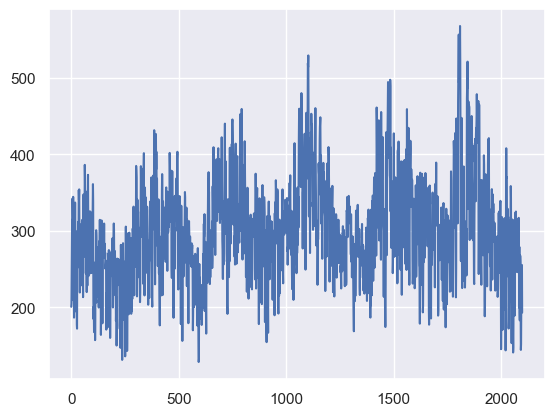

In [35]:
plt.plot(test_data)

In [36]:
unscaled_training_data = pd.read_csv('2023-Q3-Daily-supply.csv')

unscaled_test_data = pd.read_csv('2023-Q3-Daily-supply.csv')

In [37]:
all_data=pd.concat((unscaled_training_data['Total'],unscaled_test_data['Total']), axis = 0)

In [38]:
x_test_data = all_data[len(all_data) - len(test_data) - 70:].values

In [39]:
len(x_test_data)

2169

In [40]:
x_test_data = np.reshape(x_test_data, (-1, 1))

In [41]:
x_test_data = scaler.transform(x_test_data)

In [42]:
final_x_test_data = []

for i in range(70, len(x_test_data)):

    final_x_test_data.append(x_test_data[i-70:i, 0])

final_x_test_data = np.array(final_x_test_data)

In [43]:
final_x_test_data = np.reshape(final_x_test_data, (final_x_test_data.shape[0], final_x_test_data.shape[1],1))

In [44]:
predictions = rnn.predict(final_x_test_data)

66/66 [==============================] - 2s 22ms/step


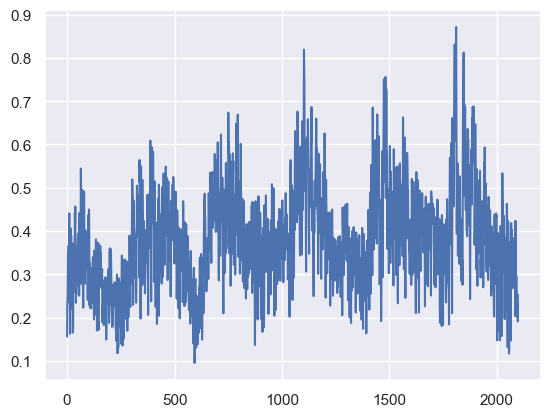

In [45]:
plt.plot(predictions) 

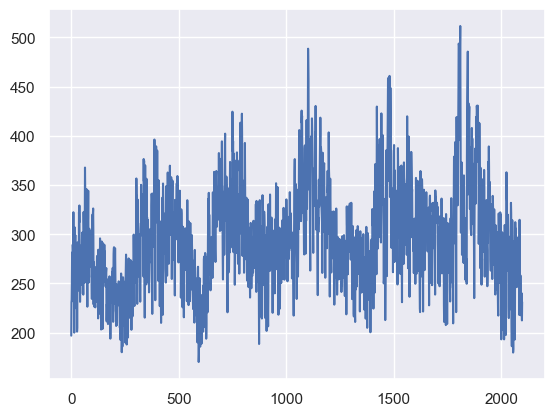

In [46]:
unscaled_predictions = scaler.inverse_transform(predictions)

plt.plot(unscaled_predictions)

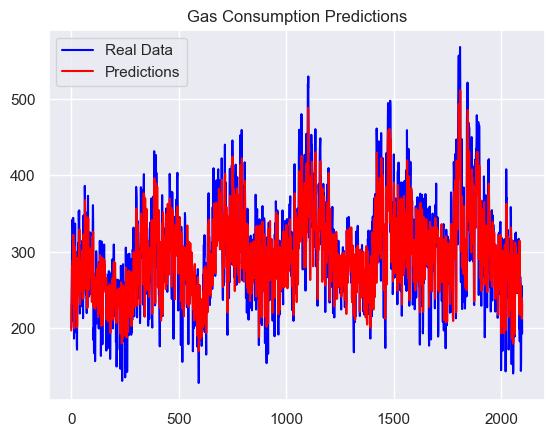

In [47]:
# Plot the results

plt.plot(test_data, color = 'blue', label = "Real Data")
plt.plot(unscaled_predictions, color = 'red', label = "Predictions")
plt.title('Gas Consumption Predictions')
plt.legend()
plt.show()

In [48]:
print("The first Consumption in Gas prediction for Jan 2018 is: ",unscaled_predictions[0])
print("The reeal first Consumption in gas for Jan 2018 is: ",test_data[0])

The first Consumption in Gas prediction for Jan 2020 is:  [196.94507]
The reeal first Consumption in gas for Jan 2020 is:  200.528802


In [49]:
print("The last Consumption in Gas prediction for Jan 2018 is: ",unscaled_predictions[30])
print("The real last Consumption in gas for Jan 2018 is: ",test_data[30])

The last Consumption in Gas prediction for Jan 2020 is:  [275.89258]
The real last Consumption in gas for Jan 2020 is:  252.025215


Text(0.5, 0.98, 'Multiplicative Decompose')

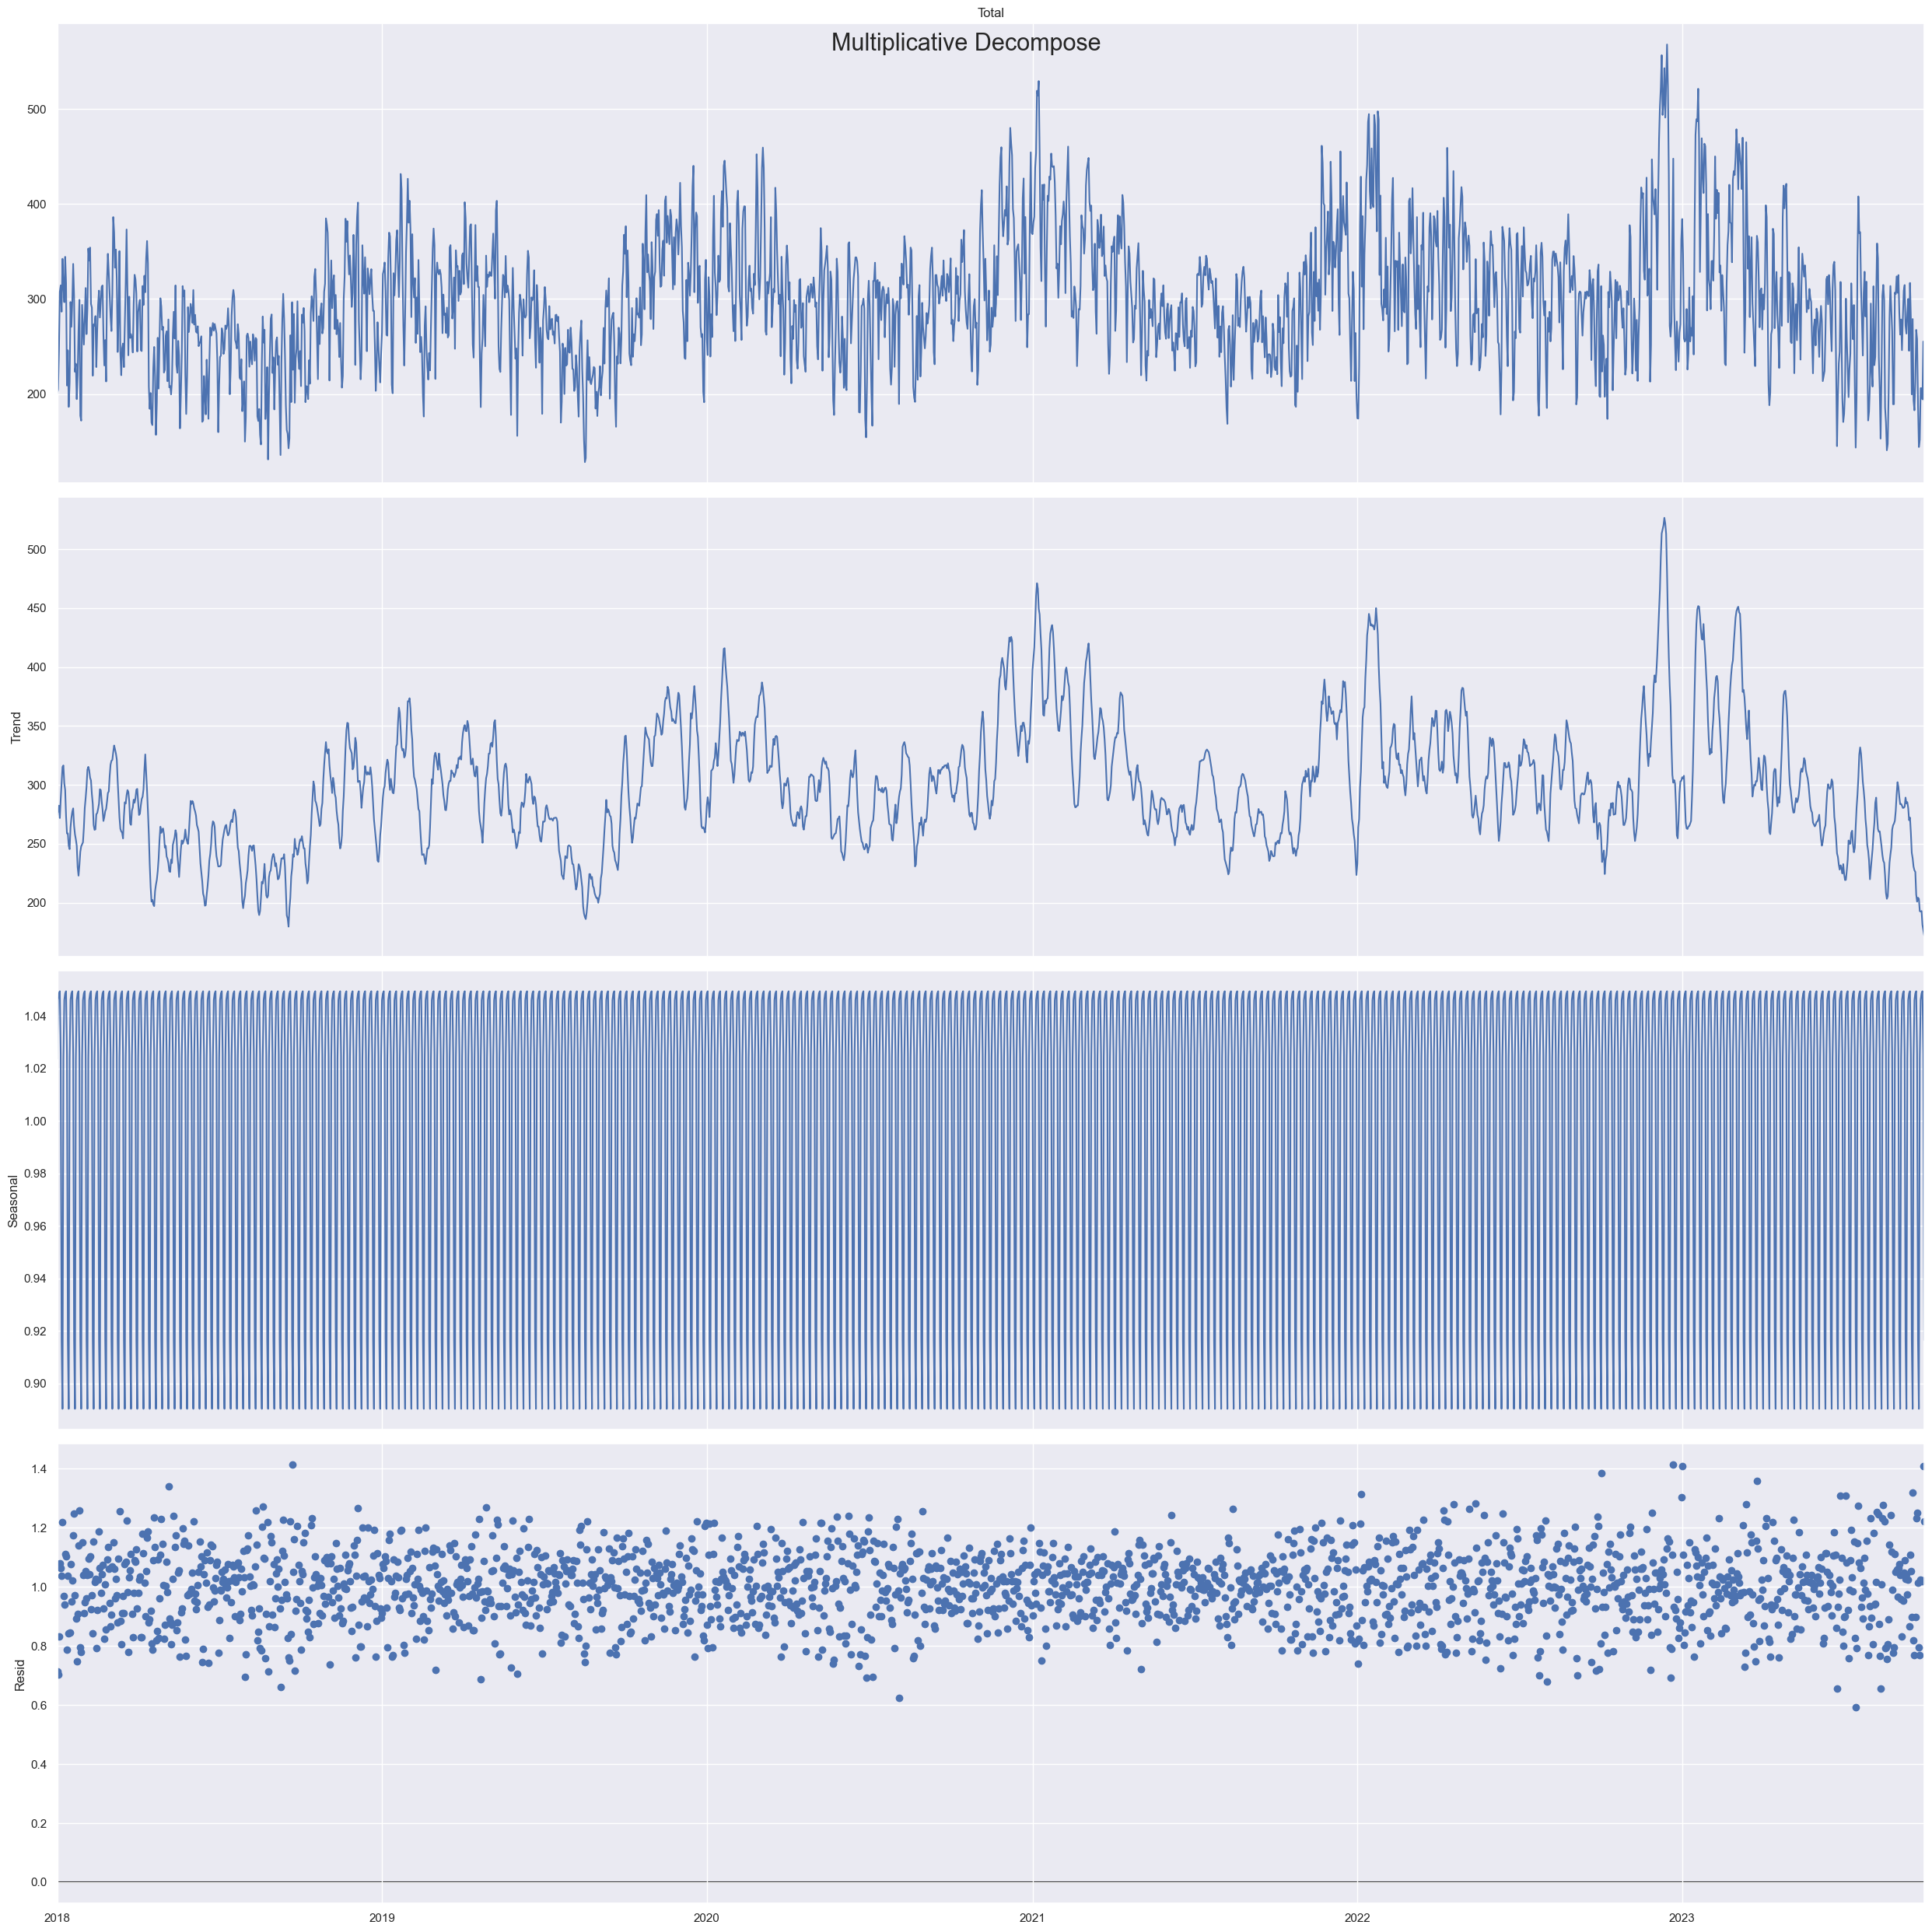

In [51]:
from statsmodels.tsa.seasonal import seasonal_decompose
from dateutil.parser import parse
%matplotlib inline
gasConsumption = pd.read_csv('2023-Q3-Daily-supply.csv')
gasConsumption = gasConsumption.drop(columns = ['Corrib production', 'Moffat', 'ROI imports via interconnector'])
gasConsumption.index = pd.to_datetime(gasConsumption['Date'], format='%d/%m/%Y')
del gasConsumption['Date']

# Multiplicative Decomposition 
result_mul = seasonal_decompose(gasConsumption['Total'], model='multiplicative', extrapolate_trend='freq')



# Plot
plt.rcParams.update({'figure.figsize': (25,25)})
result_mul.plot().suptitle('Multiplicative Decompose', fontsize=22)




Text(0.5, 0.98, 'Additive Decompose')

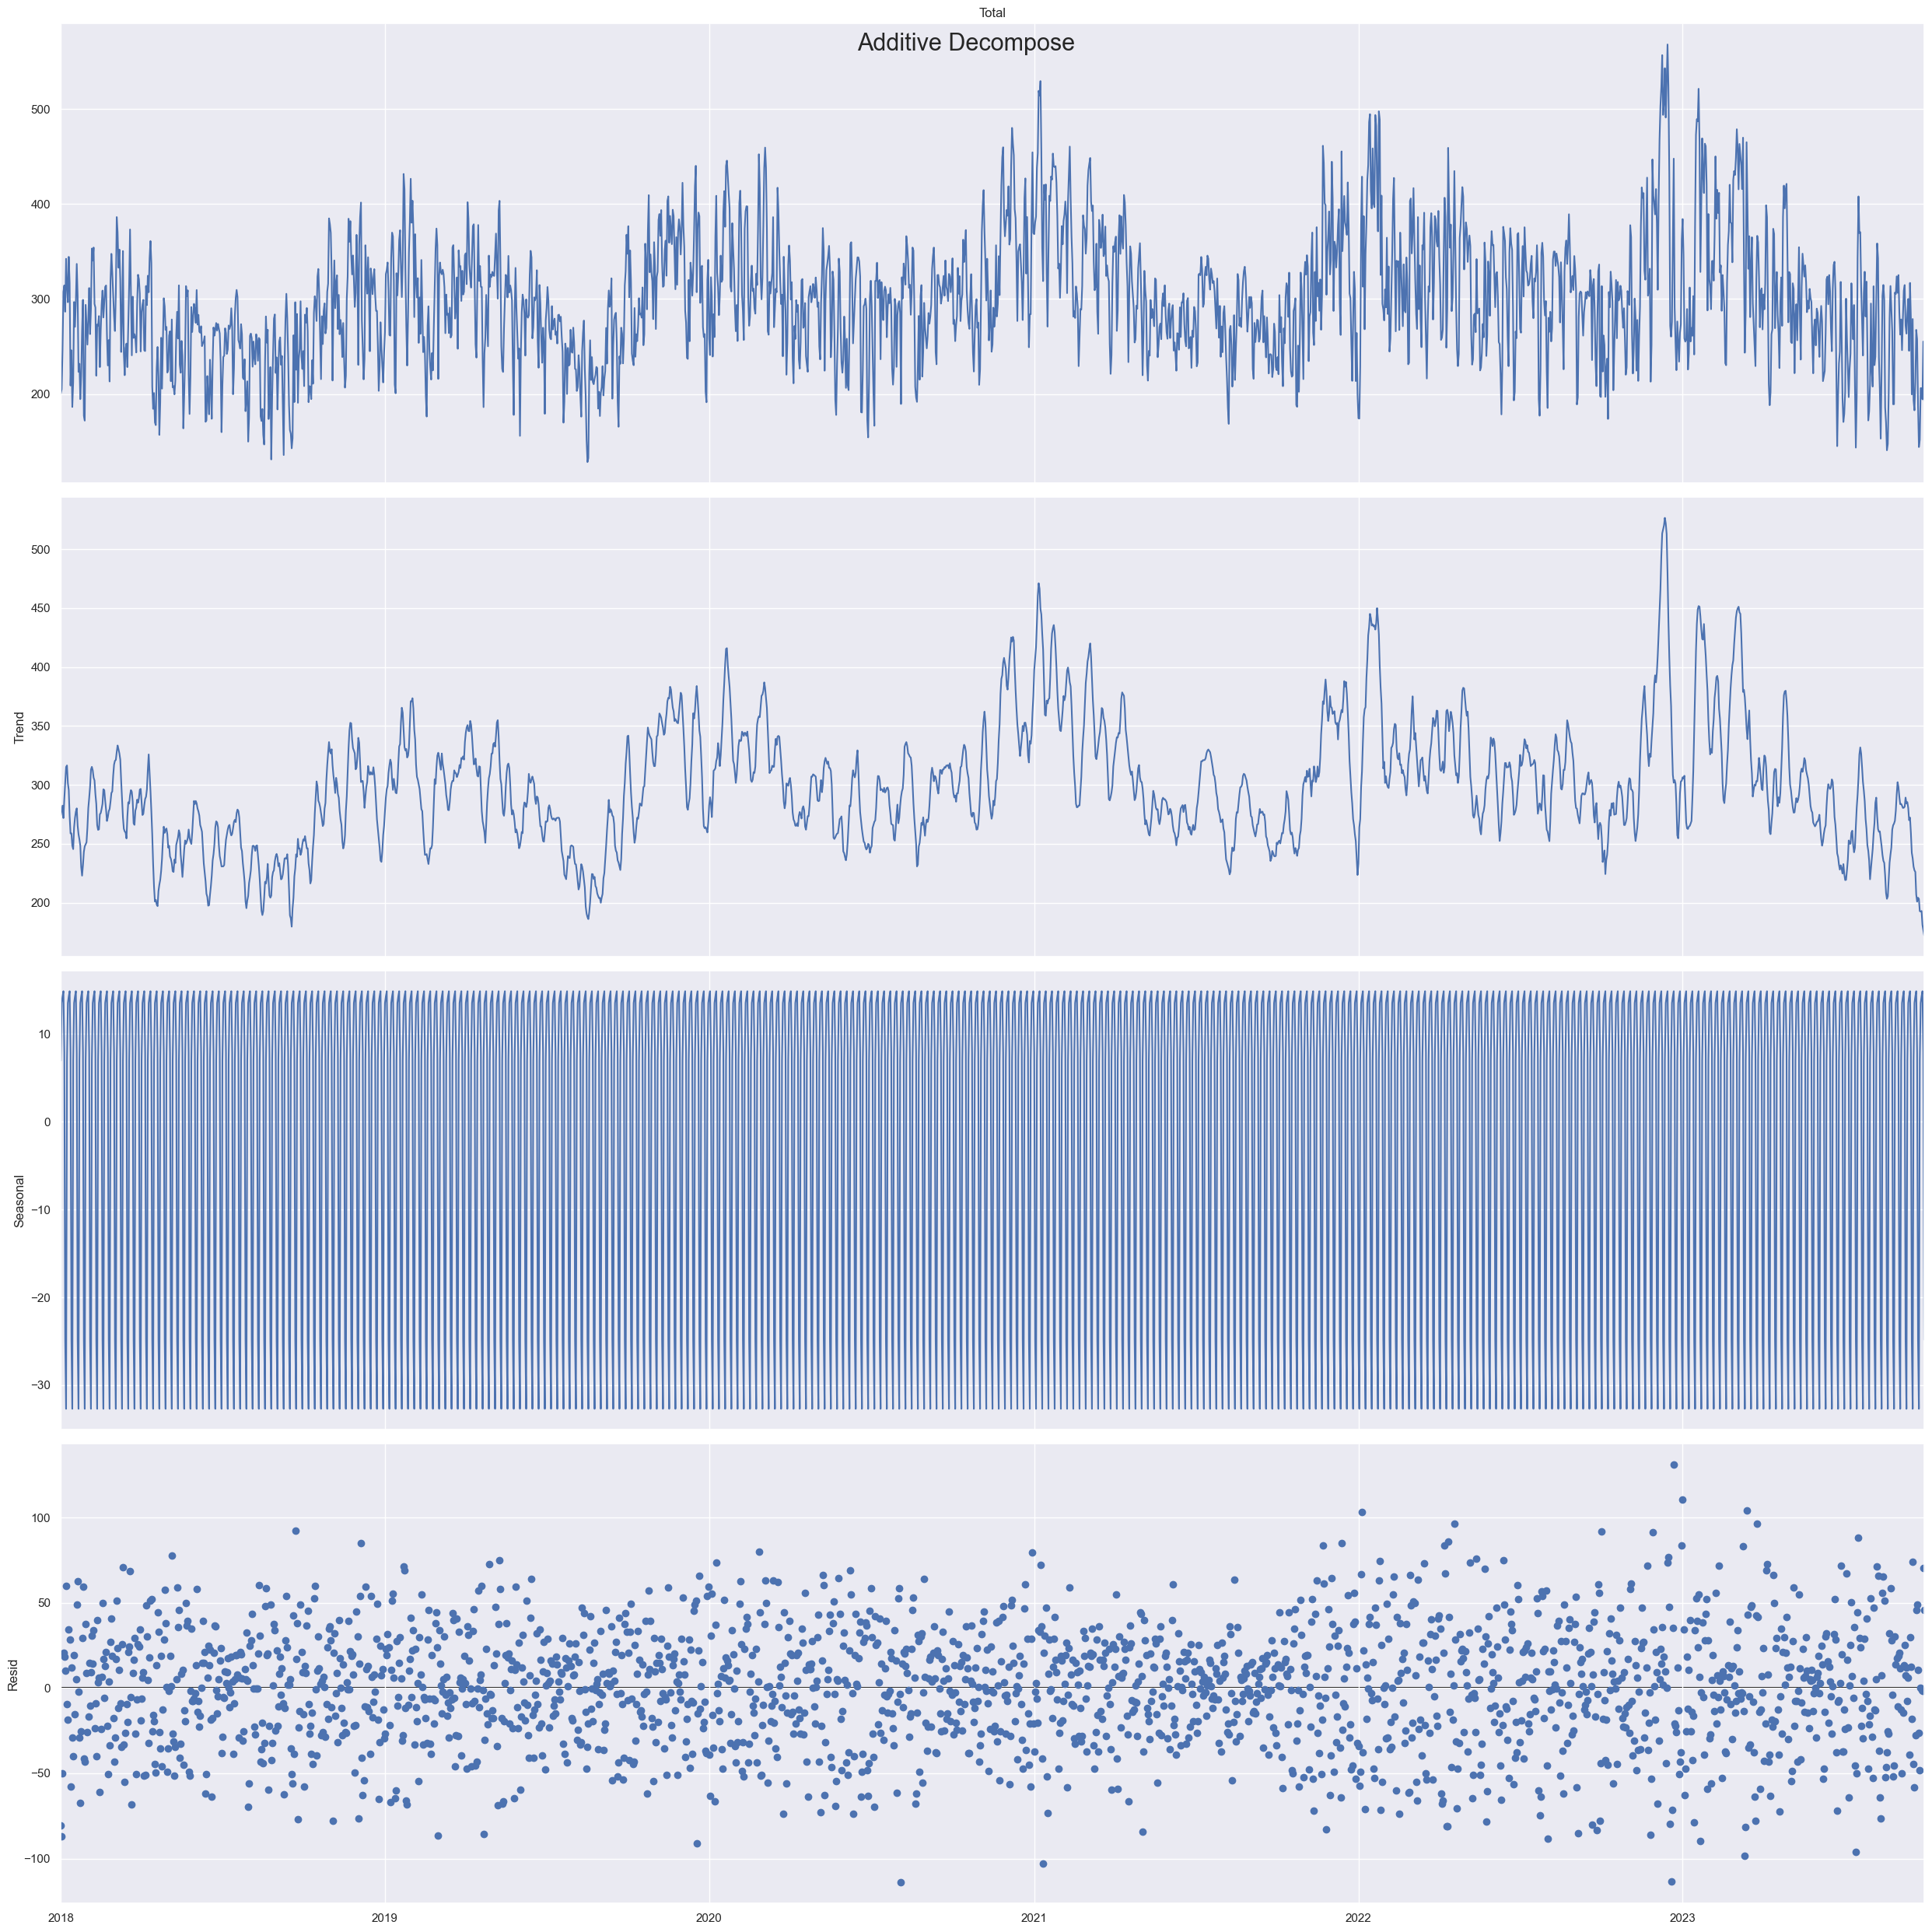

In [52]:
# Additive Decomposition
result_add = seasonal_decompose(gasConsumption['Total'], model='additive', extrapolate_trend='freq')
result_add.plot().suptitle('Additive Decompose', fontsize=22)

In [53]:
# Extract the Components ----
# Actual Values = Product of (Seasonal * Trend * Resid)
df_reconstructed = pd.concat([result_mul.seasonal, result_mul.trend, result_mul.resid, result_mul.observed], axis=1)
df_reconstructed.columns = ['seas', 'trend', 'resid', 'actual_values']
df_reconstructed.head()

seas       trend     resid  actual_values
Date                                                     
2018-01-01  1.023687  274.284375  0.714181     200.528802
2018-01-02  1.046077  278.329824  0.703684     204.880714
2018-01-03  1.048601  282.375273  0.832611     246.535364
2018-01-04  1.049417  271.857055  1.078412     307.661627
2018-01-05  1.025328  288.092339  1.064330     314.391491

In [54]:
print(gasConsumption.dtypes)



Total    float64
dtype: object


In [55]:
from statsmodels.tsa.stattools import adfuller, kpss
gasConsumption = pd.read_csv('2023-Q3-Daily-supply.csv')

gasConsumption['Date'] = pd.to_datetime(gasConsumption['Date'], format='%d/%m/%Y')

# ADF Test
result = adfuller(gasConsumption.Total.values, autolag='AIC')
print(f'ADF Statistic: {result[0]}')
print(f'p-value: {result[1]}')
for key, value in result[4].items():
    print('Critial Values:')
    print(f'   {key}, {value}')

# KPSS Test
result = kpss(gasConsumption.Total.values, regression='c')
print('\nKPSS Statistic: %f' % result[0])
print('p-value: %f' % result[1])
for key, value in result[3].items():
    print('Critial Values:')
    print(f'   {key}, {value}')
    
    

ADF Statistic: -4.551500045048825
p-value: 0.00015853716836018844
Critial Values:
   1%, -3.4335099516667325
Critial Values:
   5%, -2.8629359231480236
Critial Values:
   10%, -2.5675131253354153

KPSS Statistic: 1.091695
p-value: 0.010000
Critial Values:
   10%, 0.347
Critial Values:
   5%, 0.463
Critial Values:
   2.5%, 0.574
Critial Values:
   1%, 0.739


/var/folders/nh/kg3q1l5x6blgvx9_pfh2qghm0000gn/T/ipykernel_86525/621578461.py:15: InterpolationWarning: The test statistic is outside of the range of p-values available in the
look-up table. The actual p-value is smaller than the p-value returned.

  result = kpss(gasConsumption.Total.values, regression='c')


In [56]:
gasConsumption.head()

Date  Corrib production      Moffat  ROI imports via interconnector  \
0 2018-01-01         102.065496   71.311111                       27.152195   
1 2018-01-02         101.201763   72.300000                       31.378951   
2 2018-01-03         101.289081   94.022222                       51.224061   
3 2018-01-04         102.011852  128.000000                       77.649775   
4 2018-01-05         101.724944  127.900000                       84.766547   

        Total  
0  200.528802  
1  204.880714  
2  246.535364  
3  307.661627  
4  314.391491

Text(0.5, 1.0, 'Gas Consumption detrended by subtracting the least squares fit')

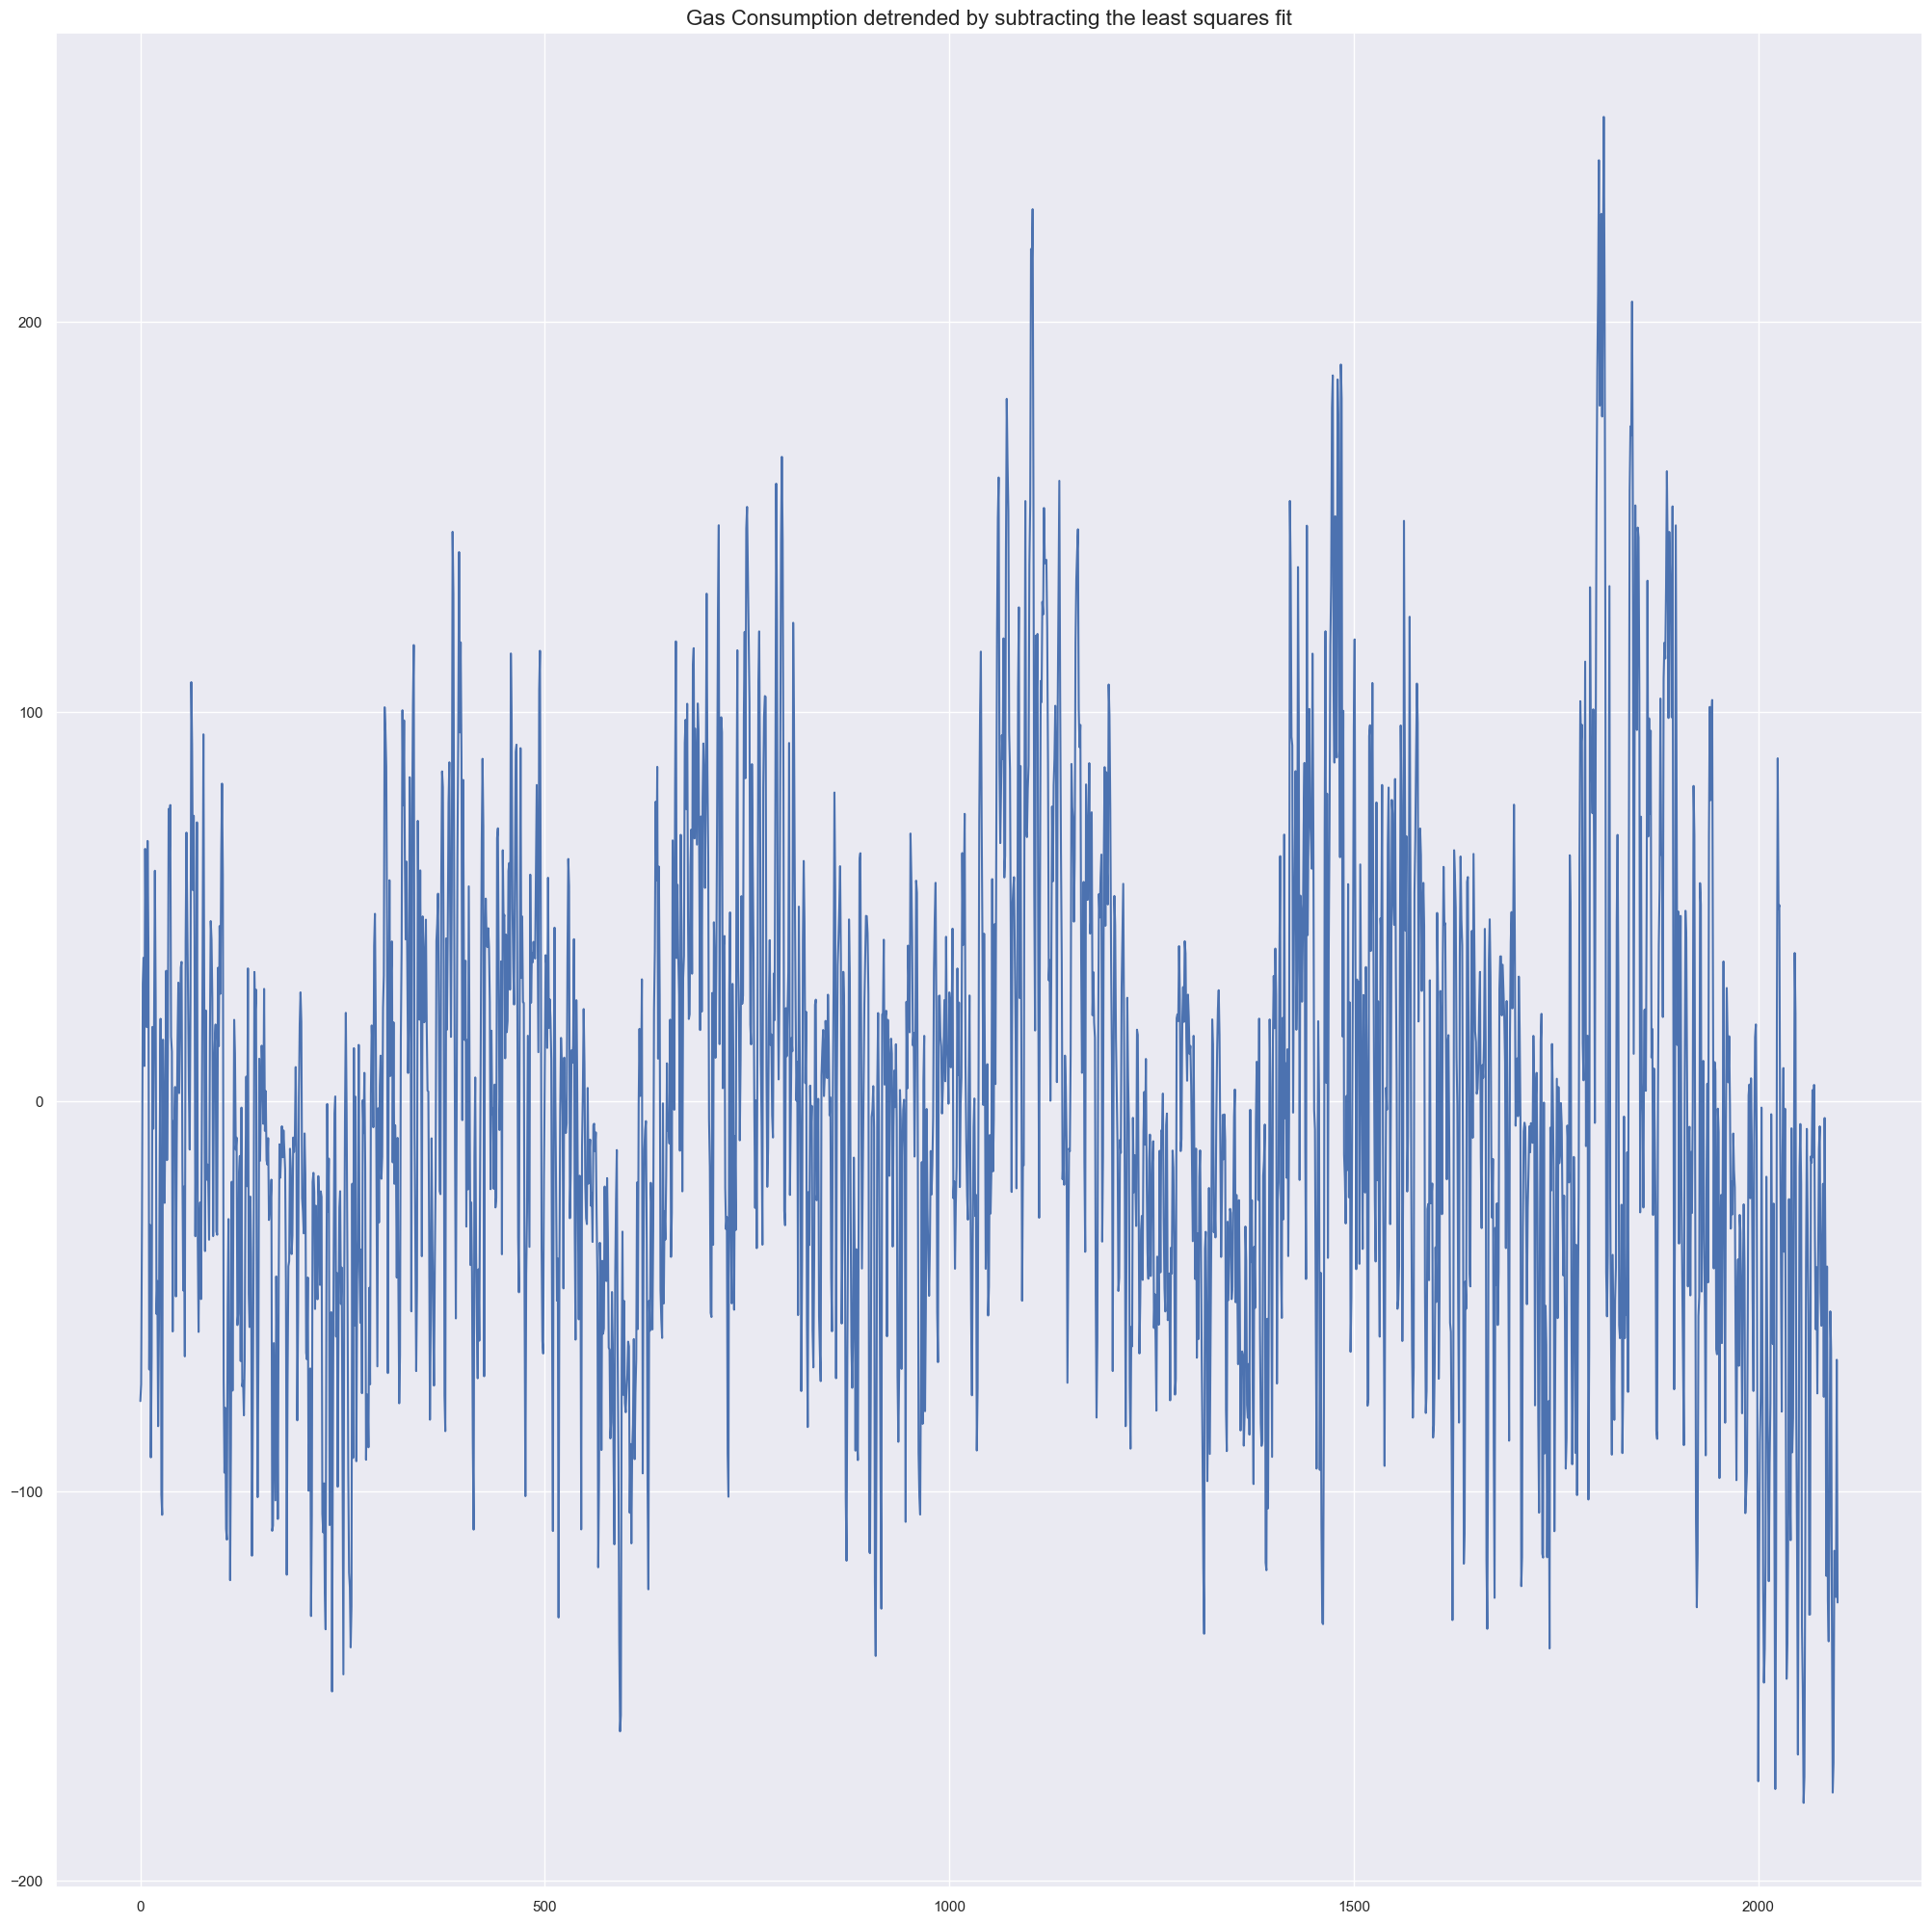

In [57]:
from scipy import signal
gasConsumption = pd.read_csv('2023-Q3-Daily-supply.csv',parse_dates=['Date'])


detrended = signal.detrend(gasConsumption.Total.values)
plt.plot(detrended)
plt.title('Gas Consumption detrended by subtracting the least squares fit', fontsize=16)

Text(0.5, 1.0, 'Gas Consumption detrended by subtracting the trend component')

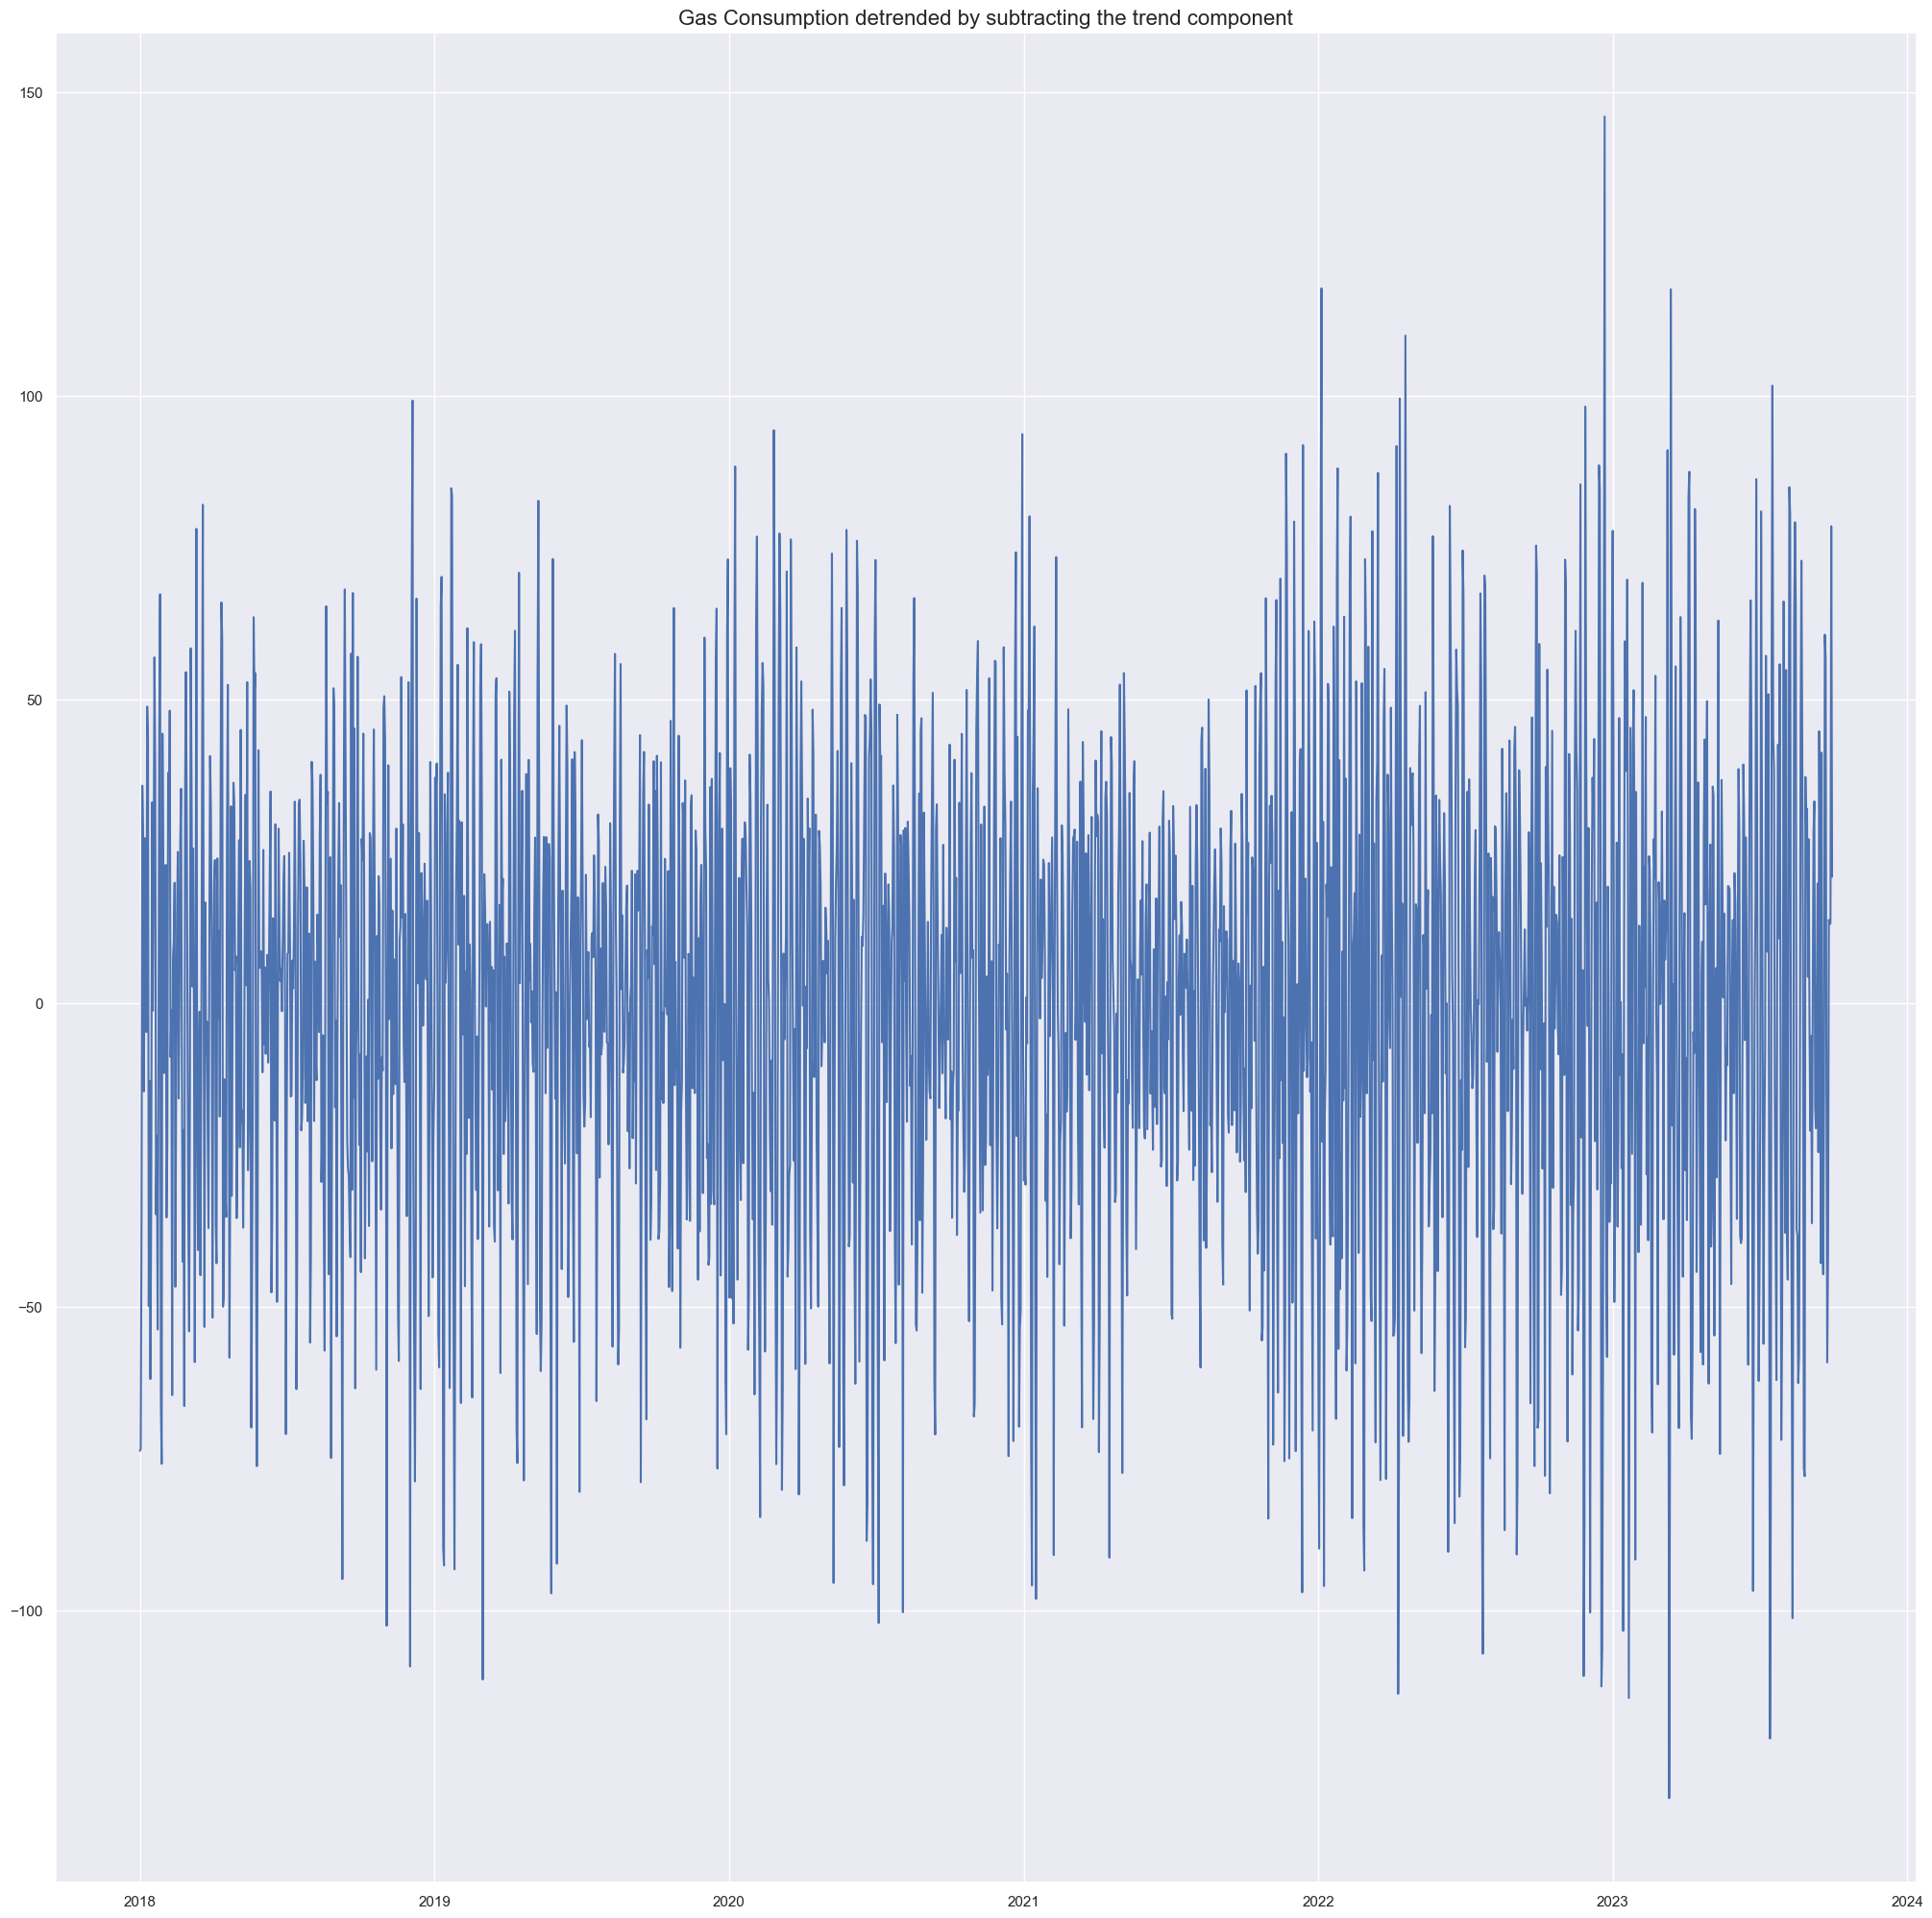

In [58]:
# Using statmodels: Subtracting the Trend Component.
from statsmodels.tsa.seasonal import seasonal_decompose
gasConsumption = pd.read_csv('2023-Q3-Daily-supply.csv')
gasConsumption.index = pd.to_datetime(gasConsumption['Date'], format='%d/%m/%Y')

result_mul = seasonal_decompose(gasConsumption['Total'], model='multiplicative', extrapolate_trend='freq')
detrended = gasConsumption.Total.values - result_mul.trend
plt.plot(detrended)
plt.title('Gas Consumption detrended by subtracting the trend component', fontsize=16)

[]

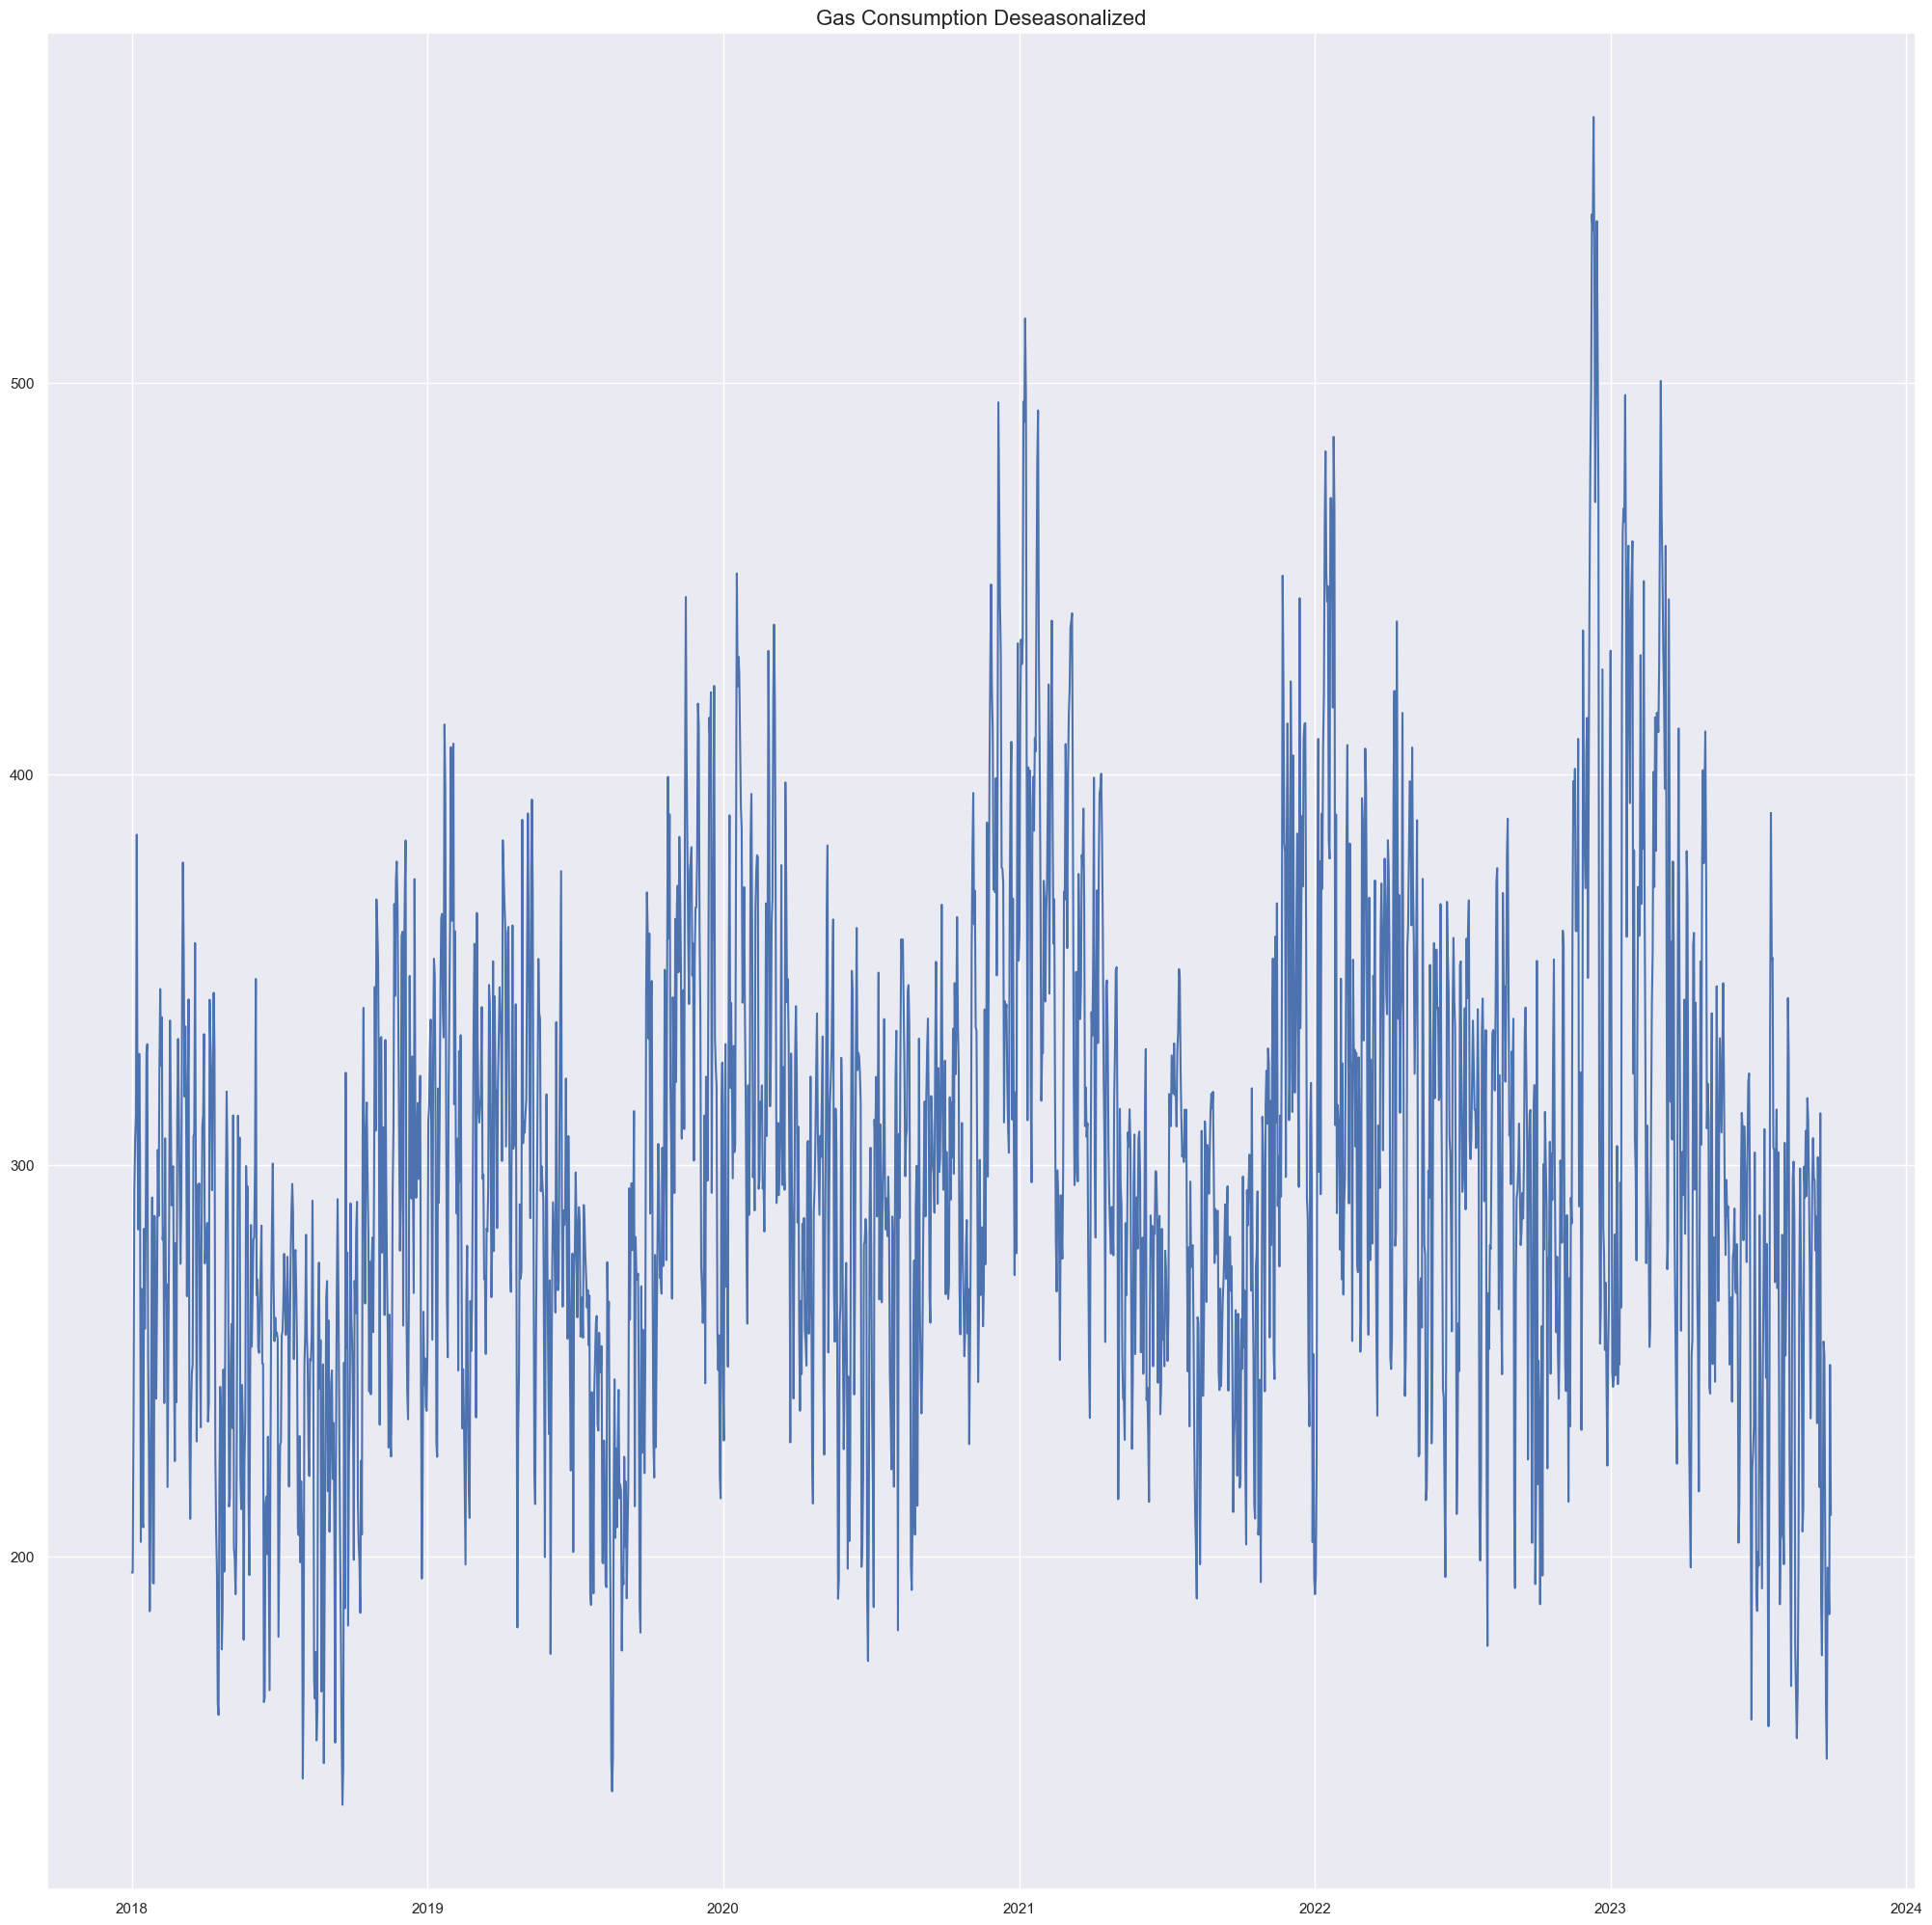

In [59]:
from statsmodels.tsa.seasonal import seasonal_decompose
# Subtracting the Trend Component.
gasConsumption = pd.read_csv('2023-Q3-Daily-supply.csv')
gasConsumption.index = pd.to_datetime(gasConsumption['Date'], format='%d/%m/%Y')
# Time Series Decomposition
result_mul = seasonal_decompose(gasConsumption['Total'], model='multiplicative', extrapolate_trend='freq')

# Deseasonalize
deseasonalized = gasConsumption['Total'].values / result_mul.seasonal

# Plot
plt.plot(deseasonalized)
plt.title('Gas Consumption Deseasonalized', fontsize=16)
plt.plot()


# test for seasonality of a time series

<Axes: xlabel='Lag', ylabel='Autocorrelation'>

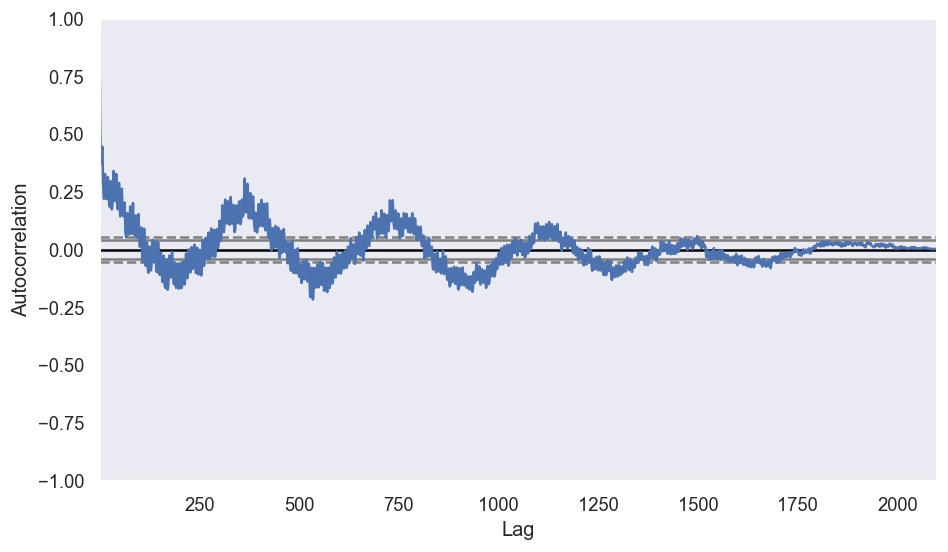

In [60]:
from pandas.plotting import autocorrelation_plot
gasConsumption = pd.read_csv('2023-Q3-Daily-supply.csv')

# Draw Plot
plt.rcParams.update({'figure.figsize':(9,5), 'figure.dpi':120})
autocorrelation_plot(gasConsumption['Total'].tolist())


# Autocorrelation and partial autocorrelation functions

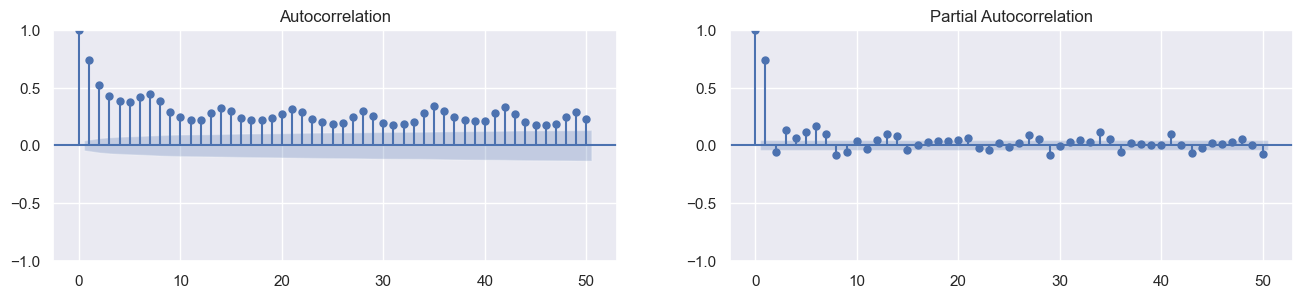

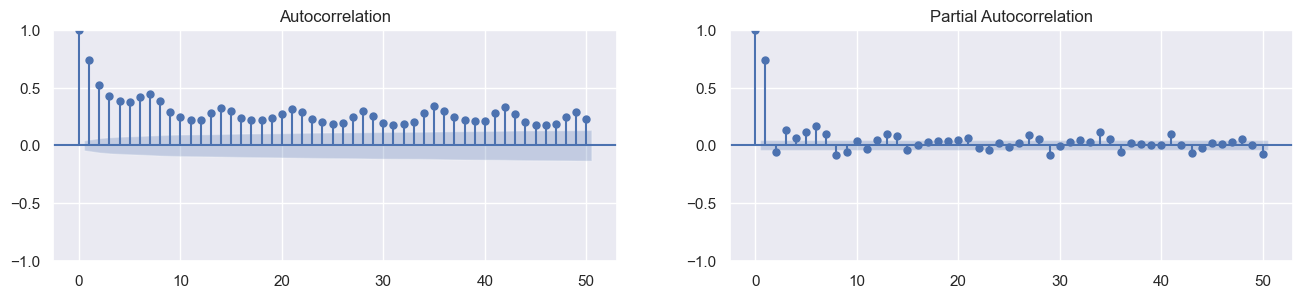

In [61]:

from statsmodels.tsa.stattools import acf, pacf
from statsmodels.graphics.tsaplots import plot_acf, plot_pacf
gasConsumption = pd.read_csv('2023-Q3-Daily-supply.csv')




# Draw Plot
fig, axes = plt.subplots(1,2,figsize=(16,3), dpi= 100)
plot_acf(gasConsumption.Total.tolist(), lags=50, ax=axes[0])
plot_pacf(gasConsumption.Total.tolist(), lags=50, ax=axes[1])

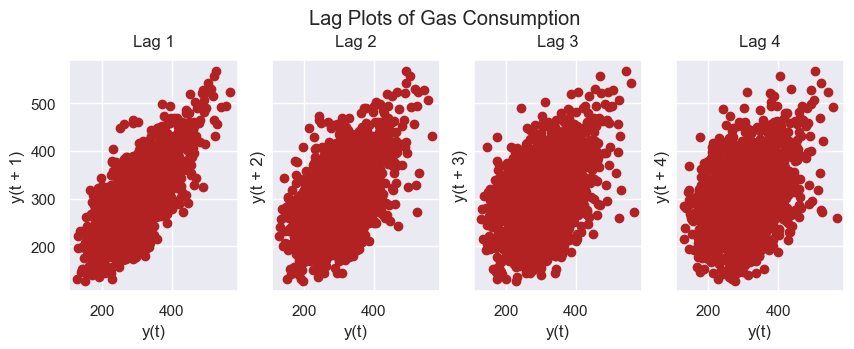

In [62]:
from pandas.plotting import lag_plot
plt.rcParams.update({'ytick.left' : False, 'axes.titlepad':10})

# Import

# Plot

fig.suptitle('Lag Plots of Sun Spots Area \n(Points get wide and scattered with increasing lag -> lesser correlation)\n', y=1.15)    

fig, axes = plt.subplots(1, 4, figsize=(10,3), sharex=True, sharey=True, dpi=100)
for i, ax in enumerate(axes.flatten()[:4]):
    lag_plot(gasConsumption.Total, lag=i+1, ax=ax, c='firebrick')
    ax.set_title('Lag ' + str(i+1))

fig.suptitle('Lag Plots of Gas Consumption', y=1.05)    
plt.show()

# Forecastability

In [63]:
rand_small = np.random.randint(0, 100, size=36)
rand_big = np.random.randint(0, 100, size=136)

def ApEn(U, m, r):
    """Compute Aproximate entropy"""
    def _maxdist(x_i, x_j):
        return max([abs(ua - va) for ua, va in zip(x_i, x_j)])

    def _phi(m):
        x = [[U[j] for j in range(i, i + m - 1 + 1)] for i in range(N - m + 1)]
        C = [len([1 for x_j in x if _maxdist(x_i, x_j) <= r]) / (N - m + 1.0) for x_i in x]
        return (N - m + 1.0)**(-1) * sum(np.log(C))

    N = len(U)
    return abs(_phi(m+1) - _phi(m))


print(ApEn(gasConsumption.Total, m=2, r=0.2*np.std(gasConsumption.Total)))   
print(ApEn(rand_small, m=2, r=0.2*np.std(rand_small))) 
print(ApEn(rand_big, m=2, r=0.2*np.std(rand_big)))     

1.6697928592787923
0.16083502693096996
0.5972926771842966


In [64]:

def SampEn(U, m, r):
    """Compute Sample entropy"""
    def _maxdist(x_i, x_j):
        return max([abs(ua - va) for ua, va in zip(x_i, x_j)])

    def _phi(m):
        x = [[U[j] for j in range(i, i + m - 1 + 1)] for i in range(N - m + 1)]
        C = [len([1 for j in range(len(x)) if i != j and _maxdist(x[i], x[j]) <= r]) for i in range(len(x))]
        return sum(C)

    N = len(U)
    return -np.log(_phi(m+1) / _phi(m))


print(SampEn(gasConsumption.Total, m=2, r=0.2*np.std(gasConsumption.Total)))   
print(SampEn(rand_small, m=2, r=0.2*np.std(rand_small)))  
print(SampEn(rand_big, m=2, r=0.2*np.std(rand_big)))      

1.688539656927381
inf
2.0794415416798357


# Granger Causality

In [65]:
from statsmodels.tsa.stattools import grangercausalitytests
gasConsumption = pd.read_csv('2023-Q3-Daily-supply.csv', parse_dates=['Date'], index_col='Date')
gasConsumption.index = pd.to_datetime(gasConsumption.index, format='%d/%m/%Y')
gasConsumption['year'] = [d.year for d in gasConsumption.index]
grangercausalitytests(gasConsumption[['Total', 'year']], maxlag=2)


Granger Causality
number of lags (no zero) 1
ssr based F test:         F=14.4287 , p=0.0001  , df_denom=2095, df_num=1
ssr based chi2 test:   chi2=14.4494 , p=0.0001  , df=1
likelihood ratio test: chi2=14.3998 , p=0.0001  , df=1
parameter F test:         F=14.4287 , p=0.0001  , df_denom=2095, df_num=1

Granger Causality
number of lags (no zero) 2
ssr based F test:         F=8.1124  , p=0.0003  , df_denom=2092, df_num=2
ssr based chi2 test:   chi2=16.2635 , p=0.0003  , df=2
likelihood ratio test: chi2=16.2008 , p=0.0003  , df=2
parameter F test:         F=8.1124  , p=0.0003  , df_denom=2092, df_num=2


{1: ({'ssr_ftest': (14.428698203474191, 0.00014971336862513573, 2095.0, 1),
   'ssr_chi2test': (14.449359823813294, 0.00014397878617364247, 1),
   'lrtest': (14.399829247511661, 0.0001478157131307872, 1),
   'params_ftest': (14.42869820348115, 0.00014971336862460038, 2095.0, 1.0)},
   array([[0., 1., 0.]])]),
 2: ({'ssr_ftest': (8.112379273550228, 0.00030933593072116934, 2092.0, 2),
   'ssr_chi2test': (16.263536650702516, 0.00029404776867092435, 2),
   'lrtest': (16.20079393677588, 0.00030341866654982316, 2),
   'params_ftest': (8.112379273553799, 0.0003093359307200583, 2092.0, 2.0)},
   array([[0., 0., 1., 0., 0.],
          [0., 0., 0., 1., 0.]])])}

In [66]:
from statsmodels.tsa.stattools import grangercausalitytests
gasConsumption = pd.read_csv('2023-Q3-Daily-supply.csv', parse_dates=['Date'], index_col='Date')
gasConsumption.index = pd.to_datetime(gasConsumption.index, format='%d/%m/%Y')
gasConsumption['month'] = [d.month for d in gasConsumption.index]
grangercausalitytests(gasConsumption[['Total', 'month']], maxlag=2)


Granger Causality
number of lags (no zero) 1
ssr based F test:         F=2.5376  , p=0.1113  , df_denom=2095, df_num=1
ssr based chi2 test:   chi2=2.5412  , p=0.1109  , df=1
likelihood ratio test: chi2=2.5397  , p=0.1110  , df=1
parameter F test:         F=2.5376  , p=0.1113  , df_denom=2095, df_num=1

Granger Causality
number of lags (no zero) 2
ssr based F test:         F=2.4595  , p=0.0857  , df_denom=2092, df_num=2
ssr based chi2 test:   chi2=4.9308  , p=0.0850  , df=2
likelihood ratio test: chi2=4.9251  , p=0.0852  , df=2
parameter F test:         F=2.4595  , p=0.0857  , df_denom=2092, df_num=2


{1: ({'ssr_ftest': (2.5375563244086523, 0.11131757022412869, 2095.0, 1),
   'ssr_chi2test': (2.541190056615443, 0.11091116321143137, 1),
   'lrtest': (2.5396522975315747, 0.11101923194931299, 1),
   'params_ftest': (2.5375563244089414, 0.11131757022412869, 2095.0, 1.0)},
   array([[0., 1., 0.]])]),
 2: ({'ssr_ftest': (2.459544809686273, 0.085720980430997, 2092.0, 2),
   'ssr_chi2test': (4.930846525728598, 0.0849728688992411, 2),
   'lrtest': (4.9250584471883485, 0.08521913990582662, 2),
   'params_ftest': (2.4595448096871824, 0.08572098043091299, 2092.0, 2.0)},
   array([[0., 0., 1., 0., 0.],
          [0., 0., 0., 1., 0.]])])}

In [67]:
gasConsumption.head()

Corrib production      Moffat  ROI imports via interconnector  \
Date                                                                        
2018-01-01         102.065496   71.311111                       27.152195   
2018-02-01         101.201763   72.300000                       31.378951   
2018-03-01         101.289081   94.022222                       51.224061   
2018-04-01         102.011852  128.000000                       77.649775   
2018-05-01         101.724944  127.900000                       84.766547   

                 Total  month  
Date                           
2018-01-01  200.528802      1  
2018-02-01  204.880714      2  
2018-03-01  246.535364      3  
2018-04-01  307.661627      4  
2018-05-01  314.391491      5

In [68]:
gasConsumption = pd.read_csv('2023-Q3-Daily-supply.csv')
gasConsumption.index = pd.to_datetime(gasConsumption['Date'], format='%d/%m/%Y')
del gasConsumption['Date']
gasConsumption = gasConsumption.drop(columns = ['Corrib production', 'Moffat', 'ROI imports via interconnector'])
train =gasConsumption[gasConsumption.index < pd.to_datetime('29-09-2022',format = '%d-%m-%Y')]
test =gasConsumption[gasConsumption.index >= pd.to_datetime('29-09-2022',format = '%d-%m-%Y')]

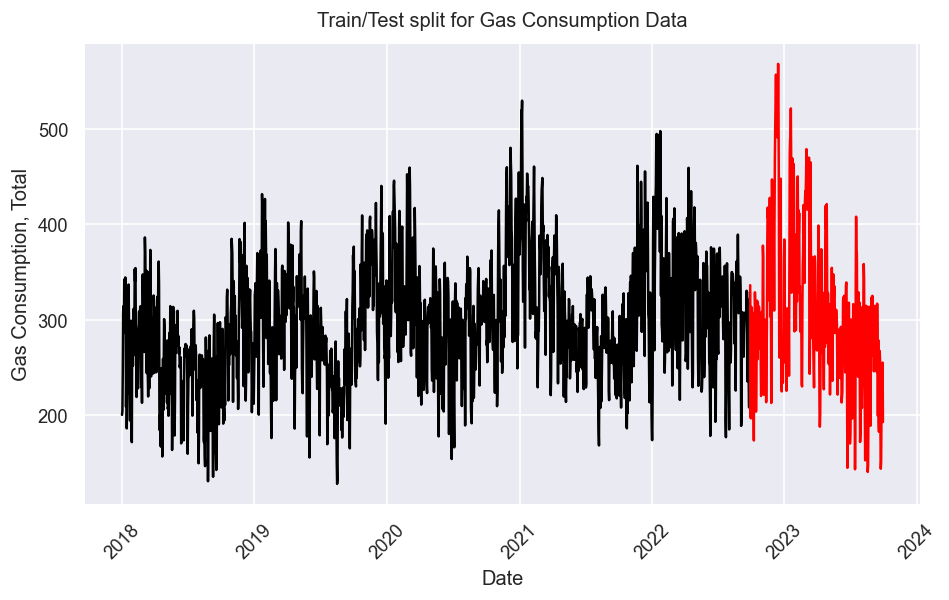

In [69]:
plt.plot(train,color ='black')
plt.plot(test,color = 'red')
plt.ylabel('Gas Consumption, Total')
plt.xlabel('Date')
plt.xticks(rotation=45)
plt.title ('Train/Test split for Gas Consumption Data')
plt.show()

RUNNING THE L-BFGS-B CODE

           * * *

Machine precision = 2.220D-16
 N =            3     M =           10

At X0         0 variables are exactly at the bounds

At iterate    0    f=  5.24022D+00    |proj g|=  3.57837D-02

At iterate    5    f=  5.23870D+00    |proj g|=  7.90533D-04

At iterate   10    f=  5.23862D+00    |proj g|=  1.45574D-04

           * * *

Tit   = total number of iterations
Tnf   = total number of function evaluations
Tnint = total number of segments explored during Cauchy searches
Skip  = number of BFGS updates skipped
Nact  = number of active bounds at final generalized Cauchy point
Projg = norm of the final projected gradient
F     = final function value

           * * *

   N    Tit     Tnf  Tnint  Skip  Nact     Projg        F
    3     12     15      1     0     0   2.847D-05   5.239D+00
  F =   5.2386188993348259     

CONVERGENCE: REL_REDUCTION_OF_F_<=_FACTR*EPSMCH             


/Users/mendoza/anaconda3/lib/python3.11/site-packages/statsmodels/tsa/base/tsa_model.py:473: ValueWarning: No frequency information was provided, so inferred frequency D will be used.
  self._init_dates(dates, freq)
/Users/mendoza/anaconda3/lib/python3.11/site-packages/statsmodels/tsa/base/tsa_model.py:473: ValueWarning: No frequency information was provided, so inferred frequency D will be used.
  self._init_dates(dates, freq)
 This problem is unconstrained.


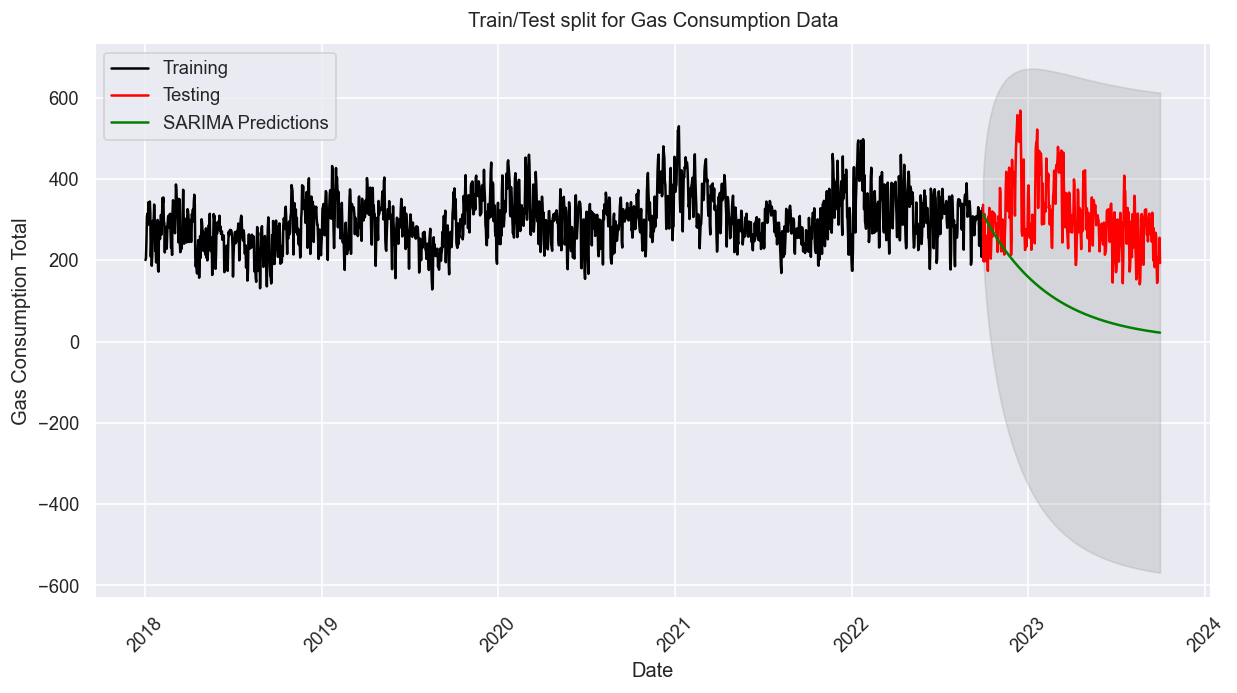

In [70]:
from statsmodels.tsa.statespace.sarimax import SARIMAX

y = train['Total']

# Fit SARIMA model
SARIMA_model = SARIMAX(y, order=(1, 0, 1))
SARIMA_model = SARIMA_model.fit()

# Forecast
y_pred = SARIMA_model.get_forecast(steps=len(test.index))
y_pred_df = y_pred.conf_int(alpha=0.05) 
y_pred_df["Predictions"] = SARIMA_model.predict(start=y_pred_df.index[0], 
                                                end=y_pred_df.index[-1])
y_pred_df.index = test.index
y_pred_out_SARIMA = y_pred_df["Predictions"]

# Plot
plt.figure(figsize=(12, 6))
plt.plot(train, color="black", label='Training')
plt.plot(test, color="red", label='Testing')
plt.plot(y_pred_out_SARIMA, color='green', label='SARIMA Predictions')
plt.fill_between(y_pred_df.index, y_pred_df.iloc[:, 0], y_pred_df.iloc[:, 1], color='gray', alpha=0.2)
plt.ylabel('Gas Consumption Total')
plt.xlabel('Date')
plt.xticks(rotation=45)
plt.title("Train/Test split for Gas Consumption Data")
plt.legend()
plt.show()


RUNNING THE L-BFGS-B CODE

           * * *

Machine precision = 2.220D-16
 N =            3     M =           10

At X0         0 variables are exactly at the bounds

At iterate    0    f=  5.24022D+00    |proj g|=  3.57837D-02

At iterate    5    f=  5.23870D+00    |proj g|=  7.90533D-04

At iterate   10    f=  5.23862D+00    |proj g|=  1.45574D-04

           * * *

Tit   = total number of iterations
Tnf   = total number of function evaluations
Tnint = total number of segments explored during Cauchy searches
Skip  = number of BFGS updates skipped
Nact  = number of active bounds at final generalized Cauchy point
Projg = norm of the final projected gradient
F     = final function value

           * * *

   N    Tit     Tnf  Tnint  Skip  Nact     Projg        F
    3     12     15      1     0     0   2.847D-05   5.239D+00
  F =   5.2386188993348259     

CONVERGENCE: REL_REDUCTION_OF_F_<=_FACTR*EPSMCH             


/Users/mendoza/anaconda3/lib/python3.11/site-packages/statsmodels/tsa/base/tsa_model.py:473: ValueWarning: No frequency information was provided, so inferred frequency D will be used.
  self._init_dates(dates, freq)
/Users/mendoza/anaconda3/lib/python3.11/site-packages/statsmodels/tsa/base/tsa_model.py:473: ValueWarning: No frequency information was provided, so inferred frequency D will be used.
  self._init_dates(dates, freq)
 This problem is unconstrained.


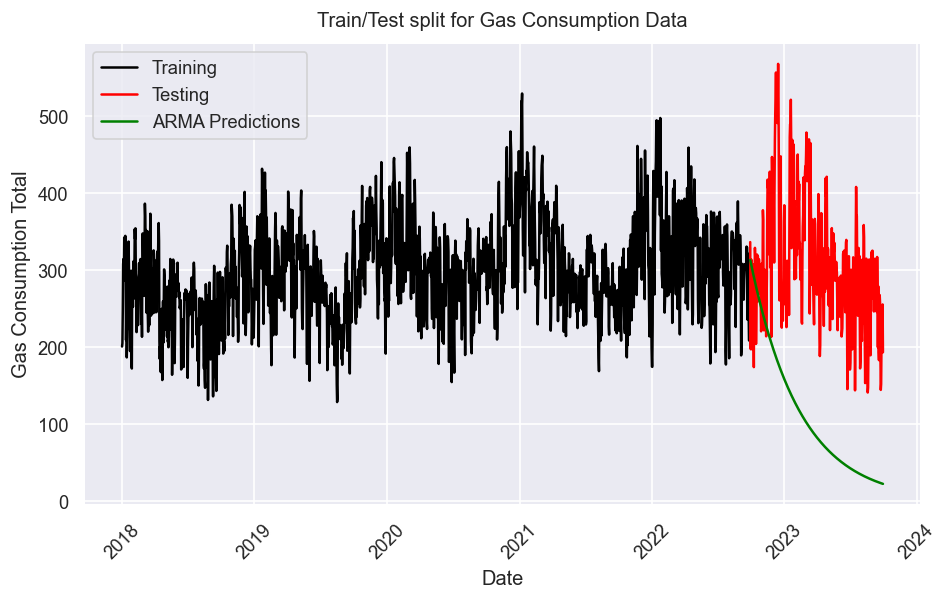

In [71]:
from statsmodels.tsa.arima.model import ARIMA


y = train['Total']

ARMAmodel = SARIMAX(y, order = (1, 0, 1))
ARMAmodel = ARMAmodel.fit()

y_pred = ARMAmodel.get_forecast(len(test.index))
y_pred_df = y_pred.conf_int(alpha = 0.05) 
y_pred_df["Predictions"] = ARMAmodel.predict(start = y_pred_df.index[0], 
                                             end = y_pred_df.index[-1])
y_pred_df.index = test.index
y_pred_outARMA = y_pred_df["Predictions"] 

plt.plot(train, color = "black", label = 'Training')
plt.plot(test, color = "red", label = 'Testing')
plt.ylabel('Gas Consumption Total')
plt.xlabel('Date')
plt.xticks(rotation=45)
plt.title("Train/Test split for Gas Consumption Data")
plt.plot(y_pred_outARMA, color='green', label = 'ARMA Predictions')
plt.legend()
plt.show()

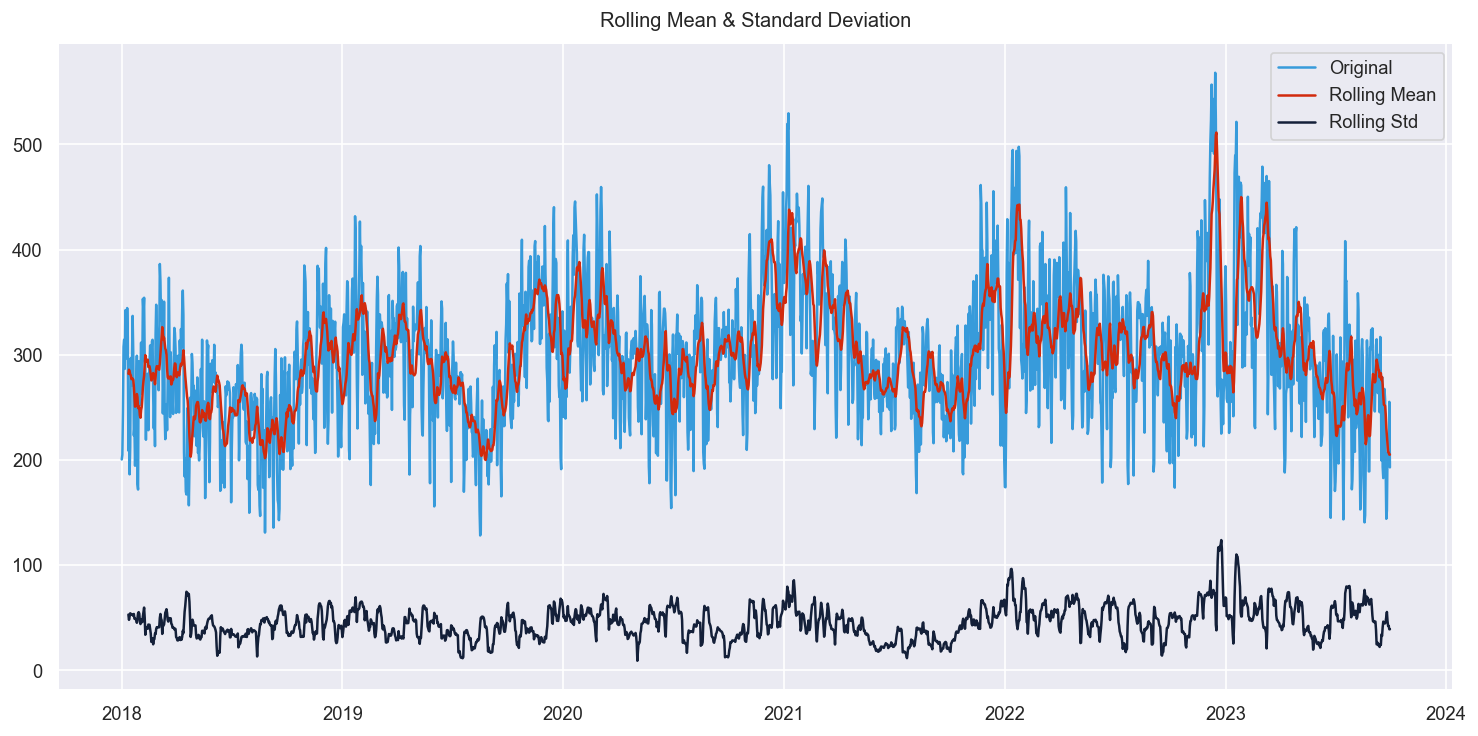

In [72]:
#Determine rolling statistics
gasConsumption["rolling_avg"] = gasConsumption["Total"].rolling(window=12).mean() 
gasConsumption["rolling_std"] = gasConsumption["Total"].rolling(window=12).std()

#Plot rolling statistics
plt.figure(figsize=(15,7))
plt.plot(gasConsumption["Total"], color='#379BDB', label='Original')
plt.plot(gasConsumption["rolling_avg"], color='#D22A0D', label='Rolling Mean')
plt.plot(gasConsumption["rolling_std"], color='#142039', label='Rolling Std')
plt.legend(loc='best')
plt.title('Rolling Mean & Standard Deviation')
plt.show(block=False)

In [73]:
#pip install pmdarima


In [74]:
import pmdarima as pm
ARIMA_model = pm.auto_arima(gasConsumption['Total'], 
                      start_p=1, 
                      start_q=1,
                      test='adf', 
                      max_p=3, max_q=3, 
                      m=1, 
                      d=None,
                      seasonal=False, 
                      trace=False, 
                      error_action='warn', 
                      suppress_warnings=True,
                      stepwise=True)

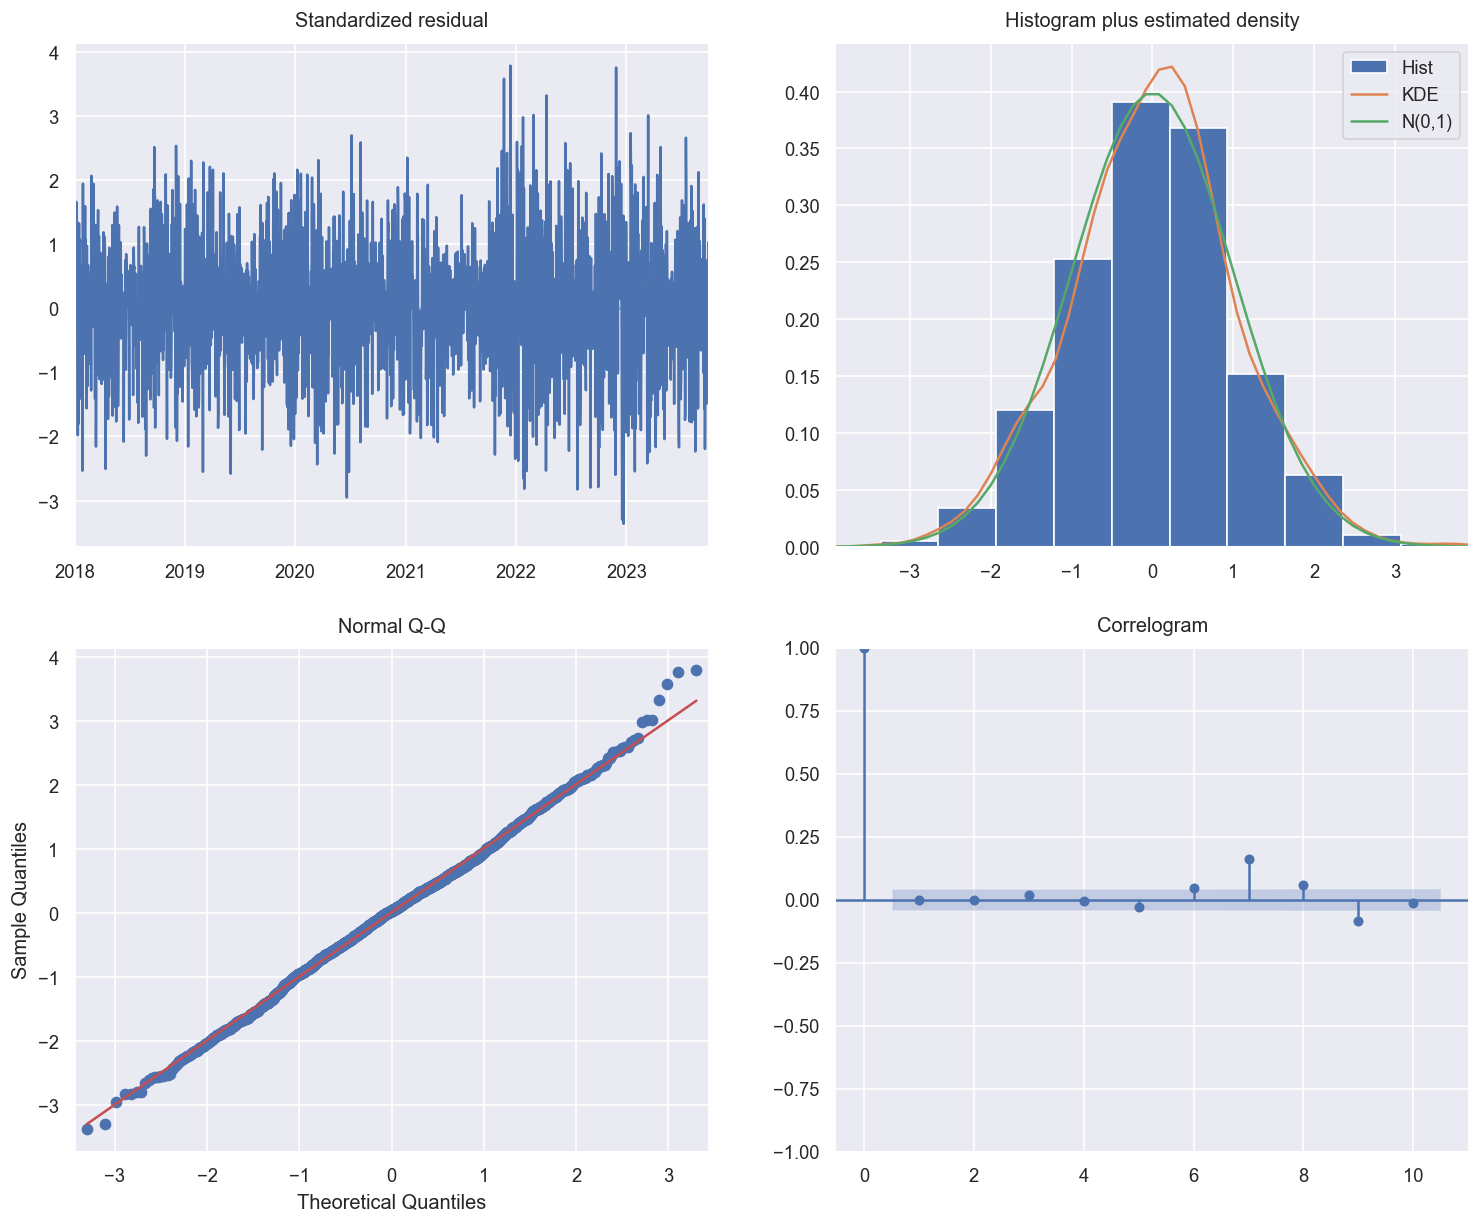

In [75]:
ARIMA_model.plot_diagnostics(figsize=(15,12))
plt.show()

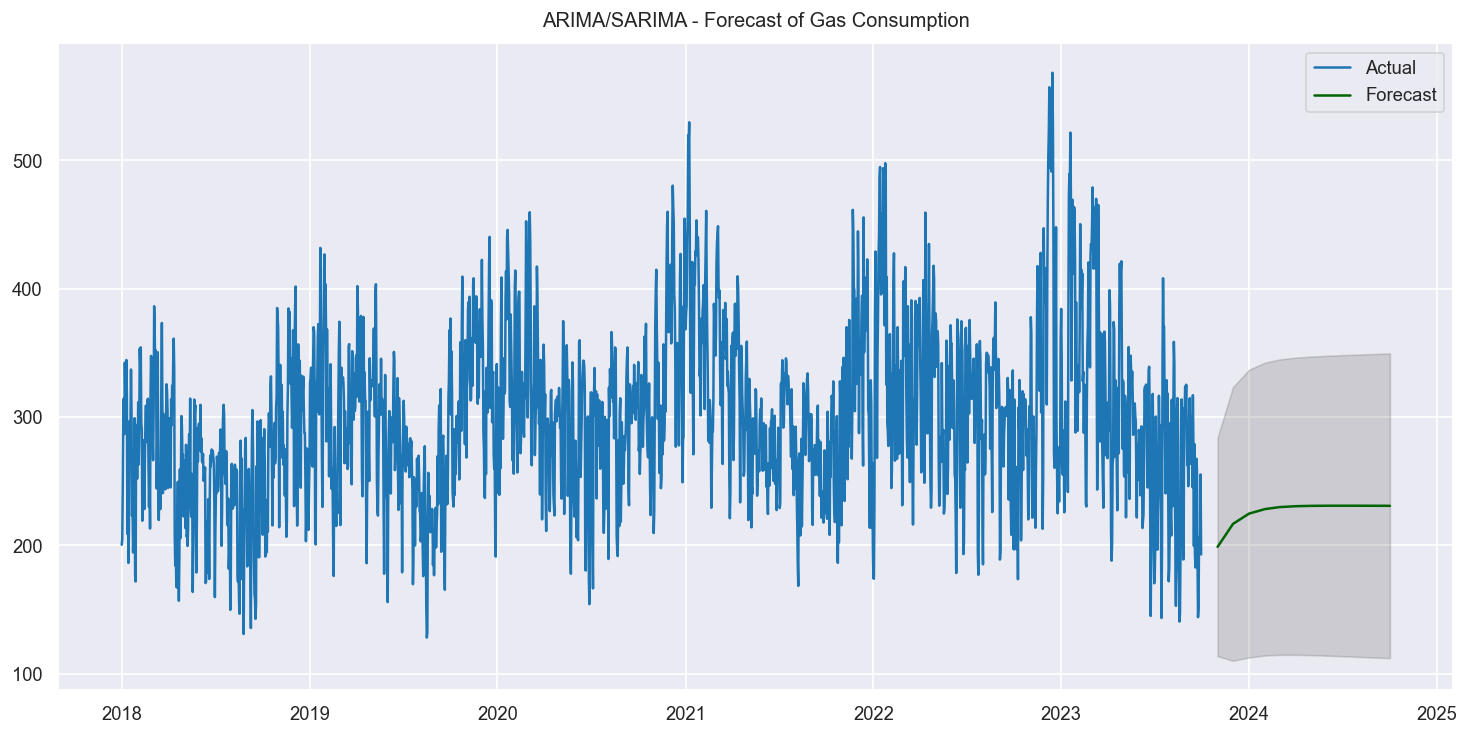

In [76]:
def forecast(ARIMA_model, periods=12):
  
        # Forecast
        n_periods = periods
        fitted, confint = ARIMA_model.predict(n_periods=n_periods, return_conf_int=True)
        index_of_fc = pd.date_range(gasConsumption.index[-1] + pd.DateOffset(months=1), periods=n_periods, freq='MS')

        # Plot
        plt.figure(figsize=(15,7))
        plt.plot(gasConsumption.index, gasConsumption["Total"], color='#1f76b4', label='Actual')
        plt.plot(index_of_fc, fitted, color='darkgreen', label='Forecast')
        plt.fill_between(index_of_fc, 
                         confint[:, 0], 
                         confint[:, 1], 
                         color='k', alpha=.15)

        plt.title("ARIMA/SARIMA - Forecast of Gas Consumption")
        plt.legend()
        plt.show()

    

# Call the forecast function
forecast(ARIMA_model)


In [77]:
try:
    SARIMA_model = pm.auto_arima(gasConsumption['Total'], start_p=1, start_q=1,
                                 test='adf',
                                 max_p=3, max_q=3, 
                                 m=12, 
                                 start_P=0, 
                                 seasonal=True,
                                 d=None, 
                                 D=1, 
                                 trace=False,
                                 error_action='ignore',  
                                 suppress_warnings=True, 
                                 stepwise=True)
except Exception as e:
    print("An error occurred:", e)


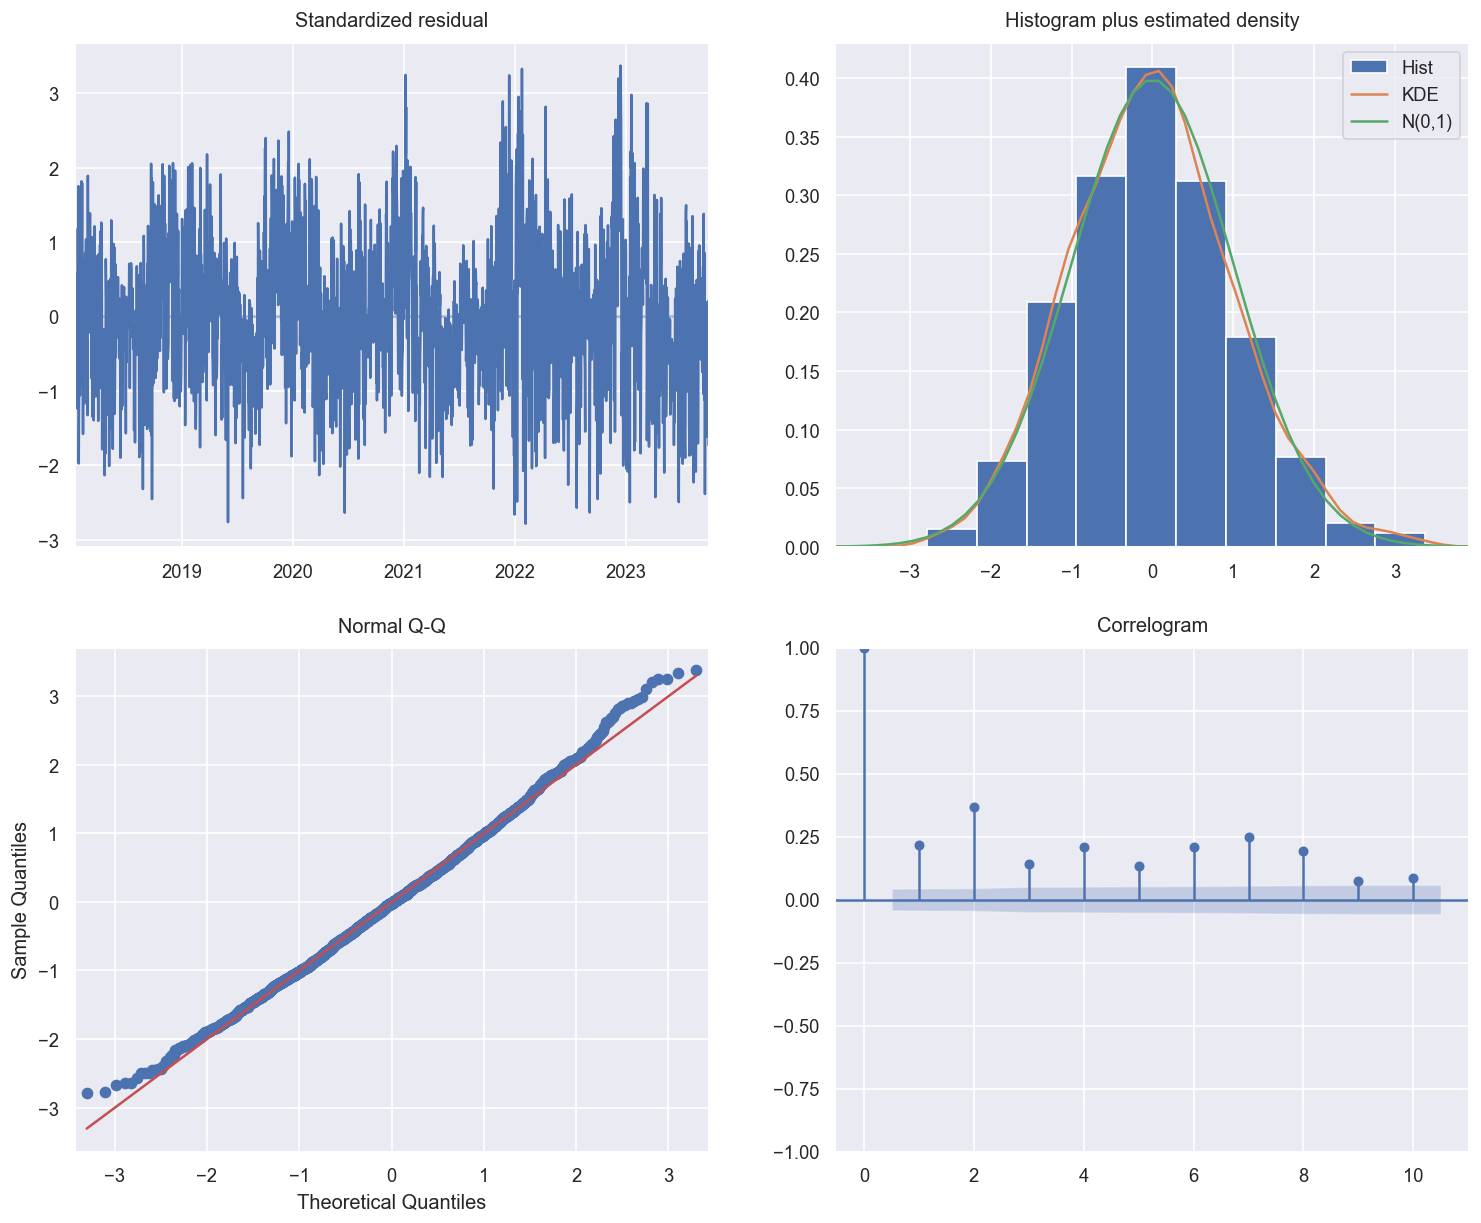

In [78]:
SARIMA_model.plot_diagnostics(figsize=(15,12))
plt.show()

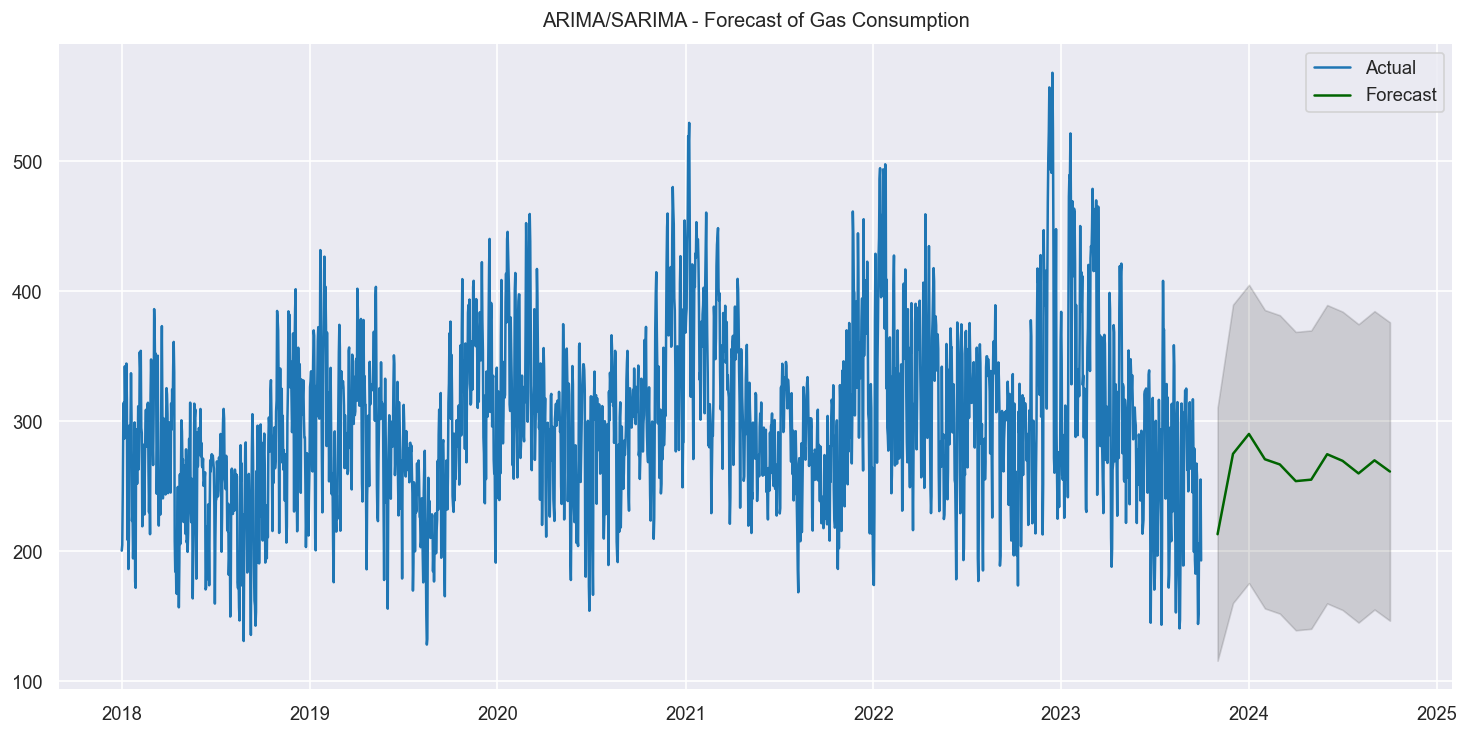

In [79]:
forecast(SARIMA_model)